In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
N=1000
beta=1.0
D=4.0
gamma=1.0/D
S0,I0,R0,=999,1,0


def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
t = np.linspace(0, 50, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


In [24]:


def plotsir(t, S, I, R):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();



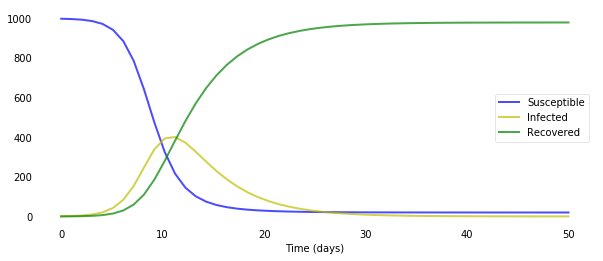

In [25]:
plotsir(t,S,I,R)

In [12]:
R

array([  0.        ,  75.39335115, 282.46411051, 444.02597691,
       569.21051706, 666.20818844, 741.36560567, 799.6003883 ,
       844.7228777 , 879.68547194, 906.77580116, 927.7664016 ,
       944.03070469, 956.63289553, 966.3975446 , 973.96356009,
       979.82599159, 984.36842313, 987.88806916, 990.61522262,
       992.72832319, 994.36563261, 995.63428124, 996.61727769,
       997.37894013, 997.9691047 , 998.4263863 , 998.7807052 ,
       999.05524475, 999.26796827, 999.43279441, 999.56050788,
       999.65946505, 999.73614077, 999.79555199, 999.84158603,
       999.87725492, 999.90489252, 999.92630716, 999.94290003,
       999.95575681, 999.96571872, 999.97343758, 999.97941844,
       999.98405264, 999.98764339, 999.99042563, 999.99258142,
       999.99425181, 999.99554609])

In [33]:
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    if D is not None:
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
        ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    else:
        ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    if L is not None:
        plt.title("Lockdown after {} days".format(L))
    plt.show();

#     if R0 is not None or CFR is not None:
#         f = plt.figure(figsize=(12,4))

    if R0 is not None:
    # sp1
        ax1 = f.add_subplot(121)
        ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

        ax1.set_xlabel('Time (days)')
        ax1.title.set_text('R_0 over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax1.yaxis.set_tick_params(length=0)
        ax1.xaxis.set_tick_params(length=0)
        ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax1.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    if Alpha is not None:
    # sp2
        ax2 = f.add_subplot(122)
        ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

        ax2.set_xlabel('Time (days)')
        ax2.title.set_text('fatality rate over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax2.yaxis.set_tick_params(length=0)
        ax2.xaxis.set_tick_params(length=0)
        ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax2.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    plt.show();

In [51]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

N = 1_000_000 * 10 * 135
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0 

In [54]:
t = np.linspace(0, 80, 80) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

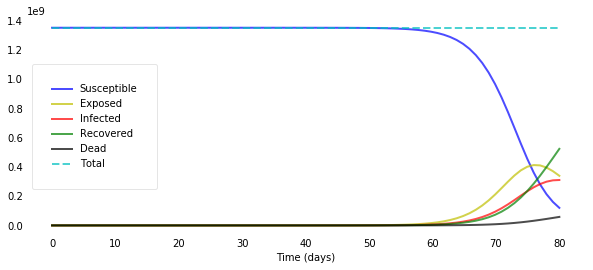

In [55]:
plotseird(t,S,E,I,R,D)

In [81]:
def deriv(y, t, N, beta, gamma, alpha, rho):
    S, I, R, D = y
    dSdt = -beta(t) * S * I / N
  #  dEdt = beta(t) * S * I / N - delta * E
  #  dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dIdt = beta(t) * S * I /N  - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dIdt, dRdt, dDdt
L=100
N = 20000
D = 14.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 6.0  # incubation period of five days
def R_0(t):
    return 5.0 if t < L else 2
def beta(t):
    return R_0(t) * gamma
t = np.linspace(0, 20, 20) # Grid of time points (in days)
def ep_model(I0,R0,D0):

    alpha = 0.034  # 20% death rate
    rho = 1/14  # 9 days from infection until death
    I0=I0-R0- D0
    S0 = N-I0  # initial conditions: one exposed

    y0 = S0, I0, R0, D0 # Initial conditions vector

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, alpha, rho))
    S, I, R, D = ret.T
    plotsird(t, S, I, R, D)

In [83]:
def plotsird(t, S, I, R, D=None, L=None, R0=None, Alpha=None):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
   # ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    if D is not None:
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
        ax.plot(t, S+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    else:
        ax.plot(t, S+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    if L is not None:
        plt.title("Lockdown after {} days".format(L))
    plt.show();

#     if R0 is not None or CFR is not None:
#         f = plt.figure(figsize=(12,4))

    if R0 is not None:
        ax1 = f.add_subplot(121)
        ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

        ax1.set_xlabel('Time (days)')
        ax1.title.set_text('R_0 over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax1.yaxis.set_tick_params(length=0)
        ax1.xaxis.set_tick_params(length=0)
        ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax1.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    if Alpha is not None:
    # sp2
        ax2 = f.add_subplot(122)
        ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

        ax2.set_xlabel('Time (days)')
        ax2.title.set_text('fatality rate over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax2.yaxis.set_tick_params(length=0)
        ax2.xaxis.set_tick_params(length=0)
        ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax2.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    plt.show();

In [4]:
import pandas as pd
df_dth=pd.read_csv("/home/dj/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_con=pd.read_csv("/home/dj/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_rec=pd.read_csv("/home/dj/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [5]:
df_con=df_con.loc[df_con["Country/Region"]=="India"]
df_rec=df_rec.loc[df_rec["Country/Region"]=="India"]
df_dth= df_dth.loc[df_dth["Country/Region"]=="India"]

In [6]:
df_con=df_con.drop(["Province/State","Country/Region","Lat","Long"], axis=1)
df_rec=df_rec.drop(["Province/State","Country/Region","Lat","Long"], axis=1)
df_dth=df_dth.drop(["Province/State","Country/Region","Lat","Long"], axis=1)

In [7]:
df_con=df_con.T
df_dth=df_dth.T
df_rec=df_rec.T

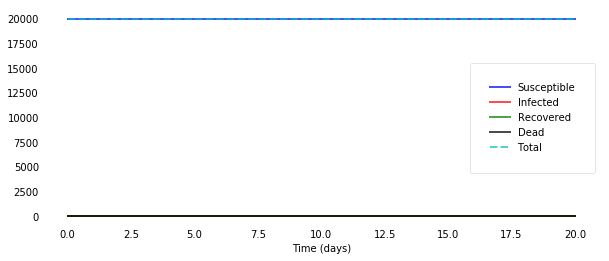

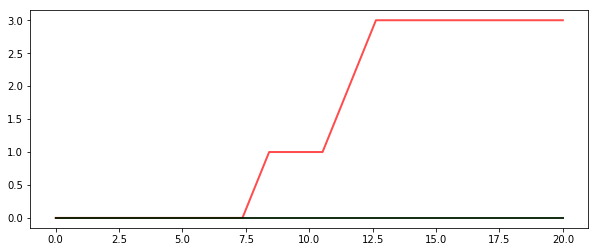

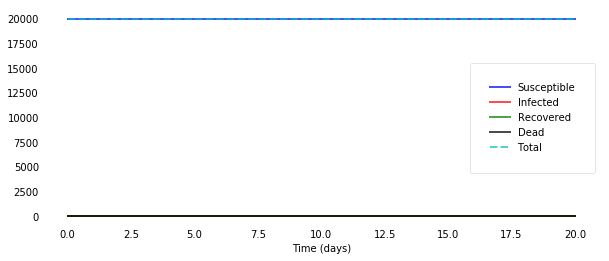

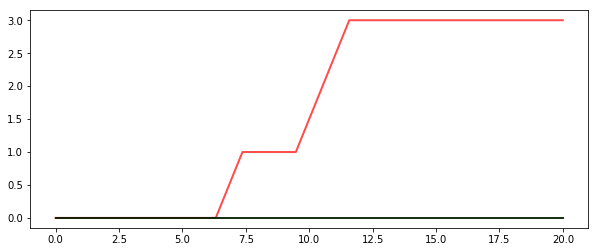

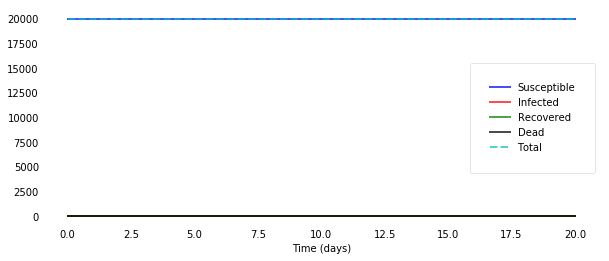

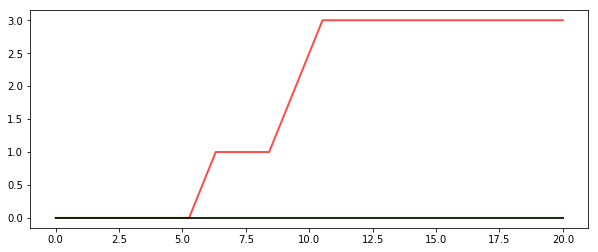

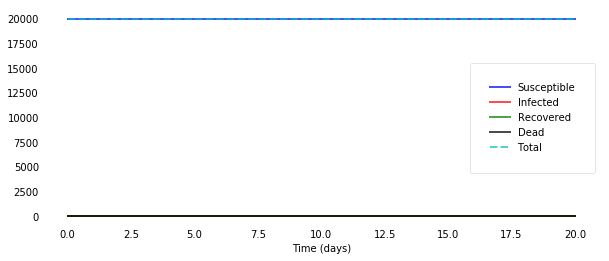

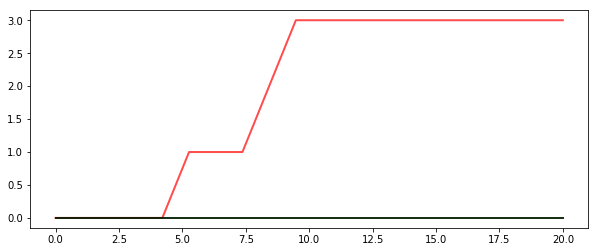

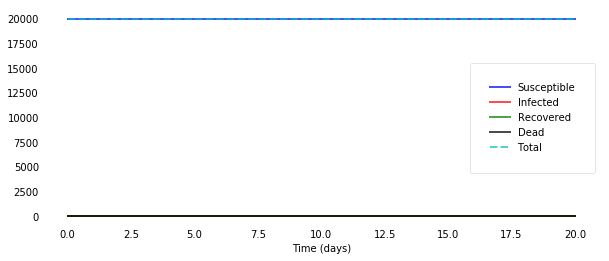

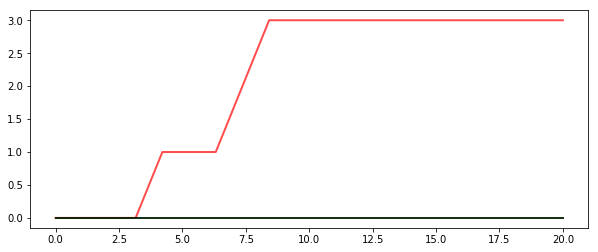

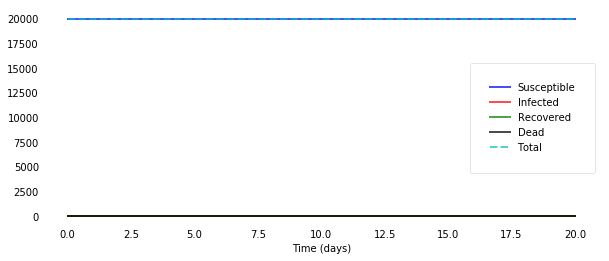

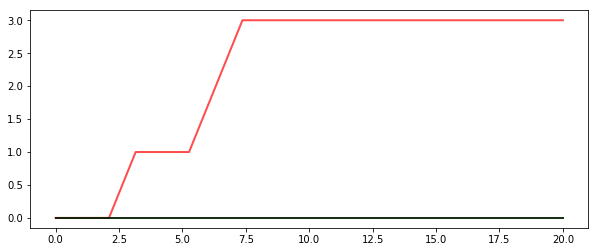

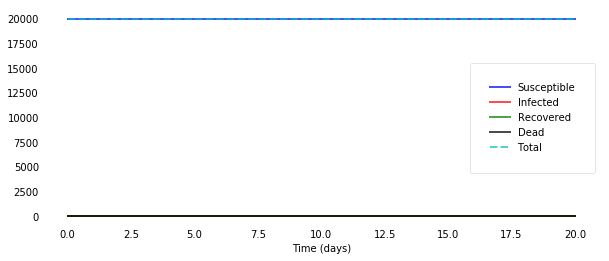

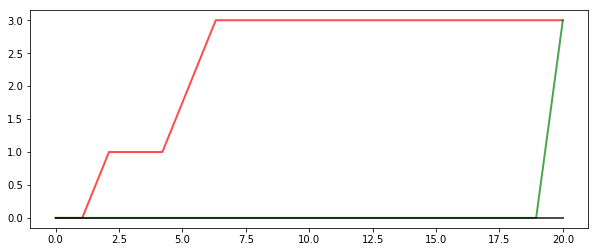

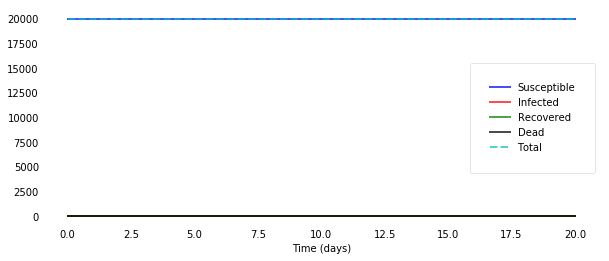

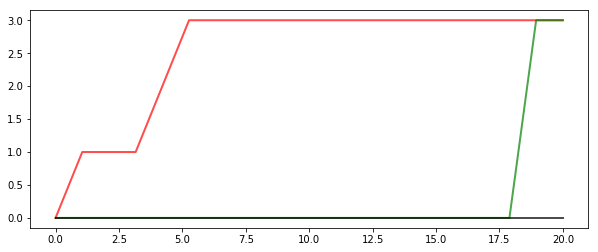

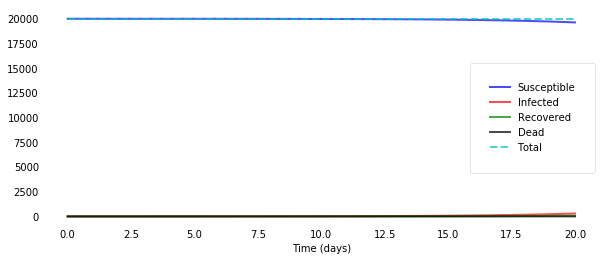

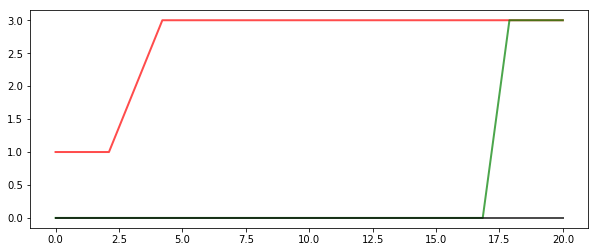

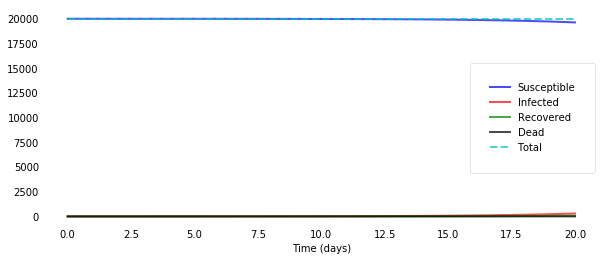

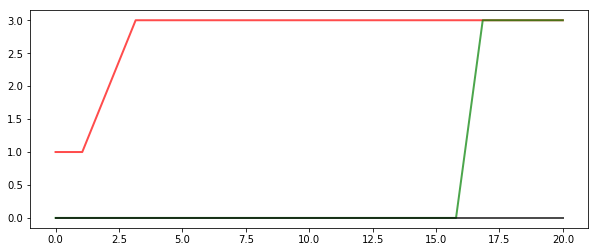

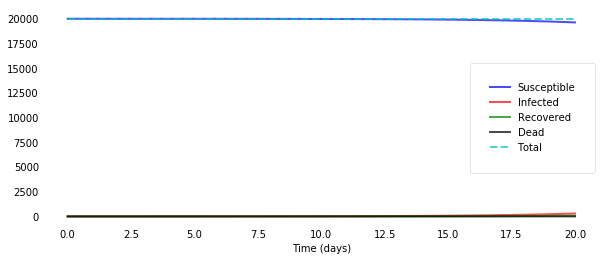

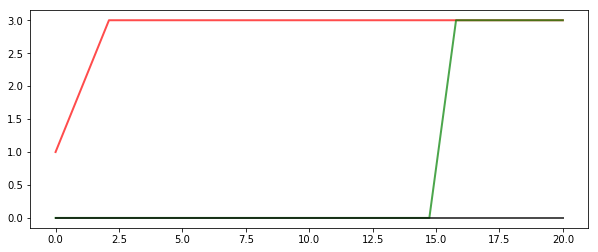

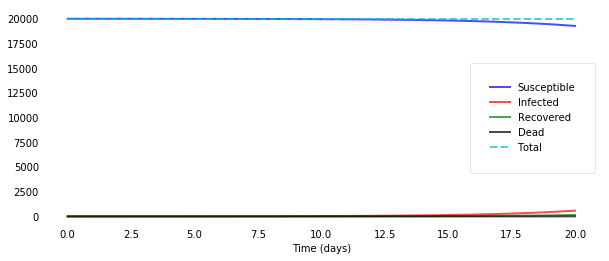

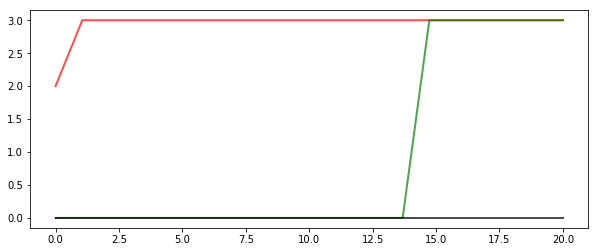

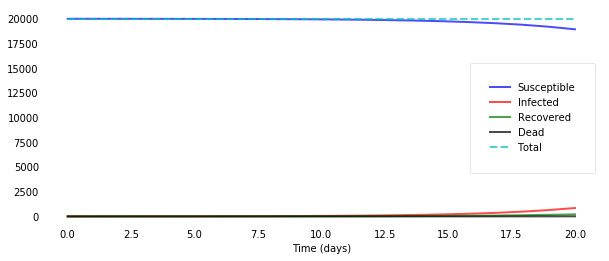

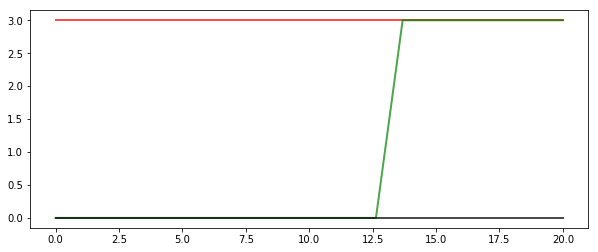

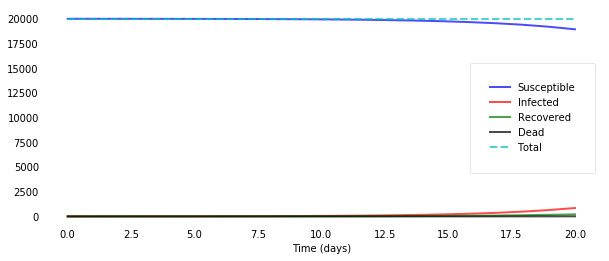

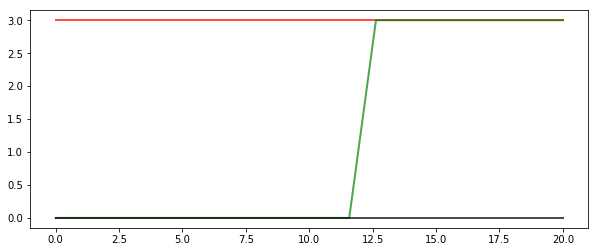

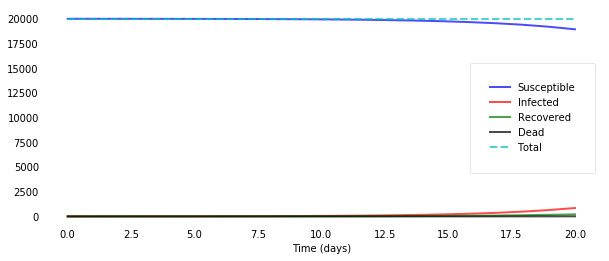

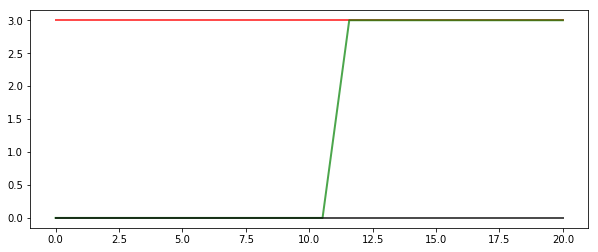

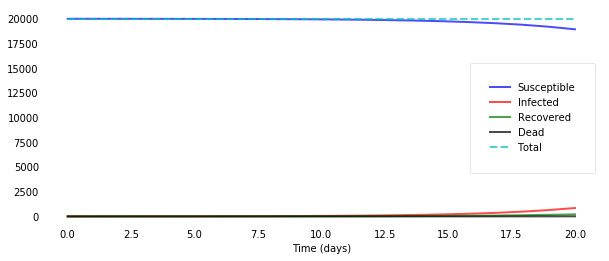

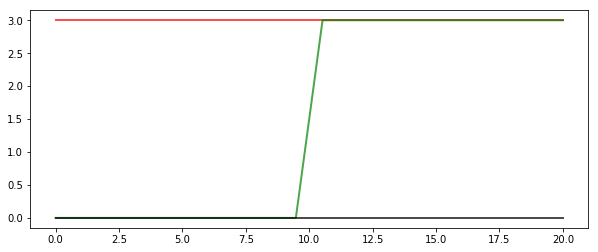

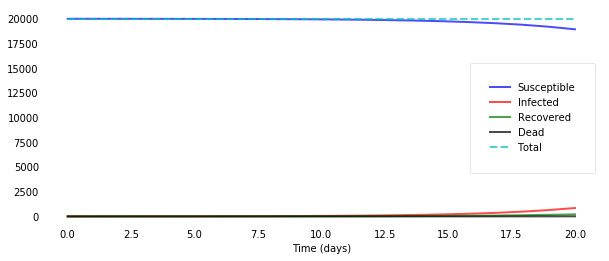

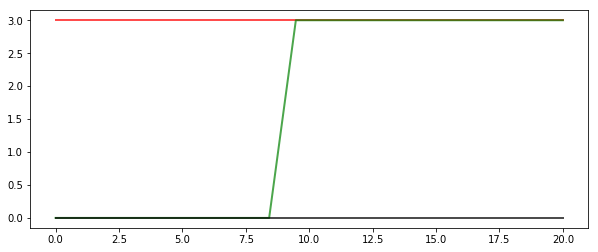

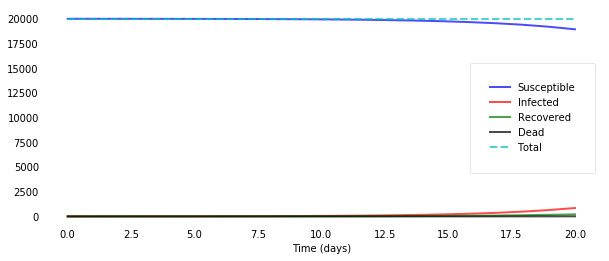

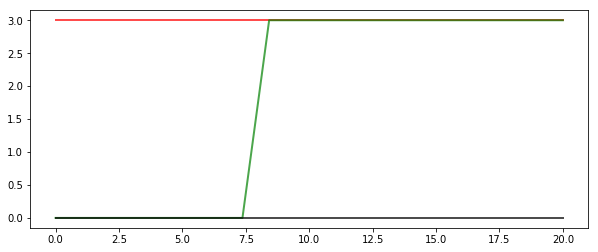

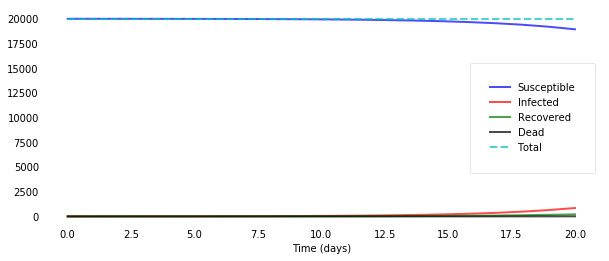

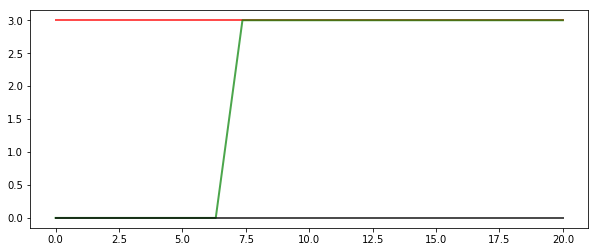

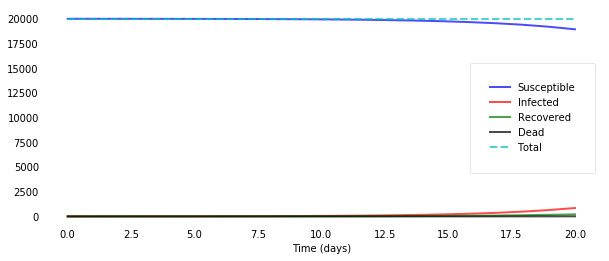

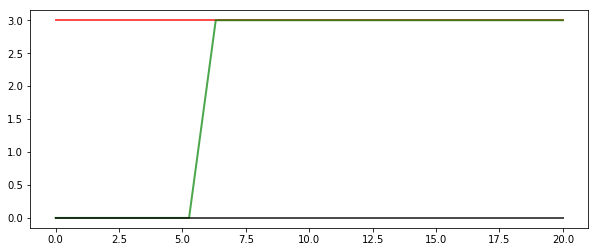

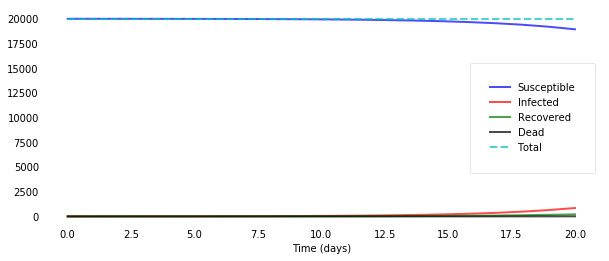

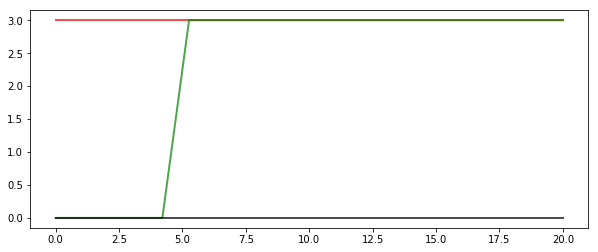

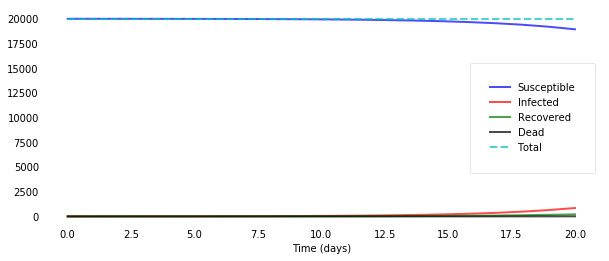

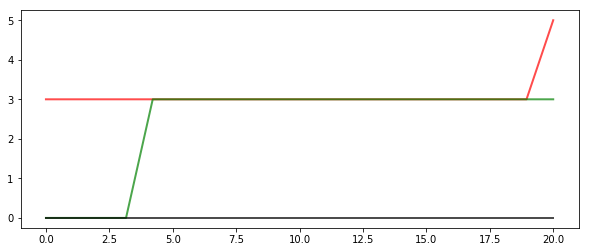

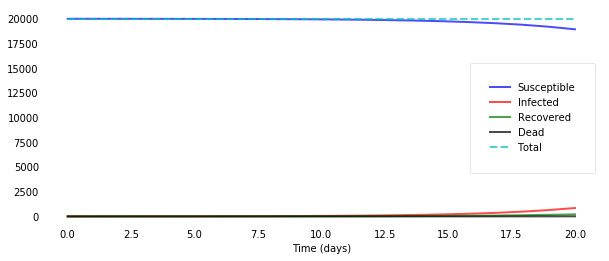

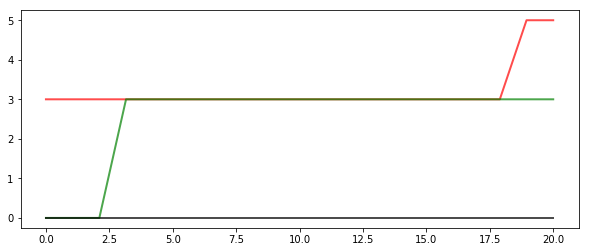

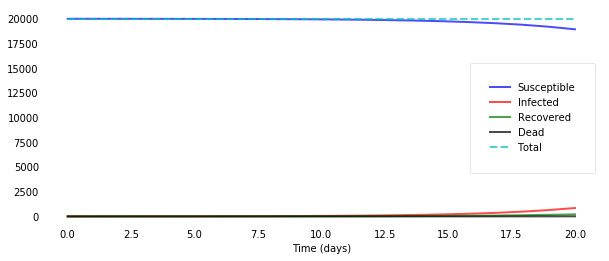

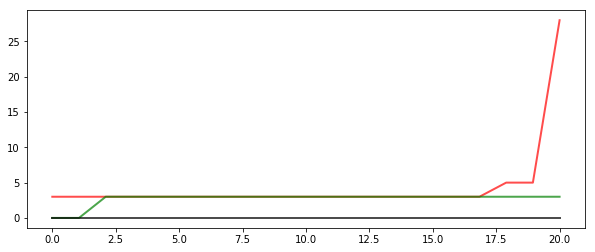

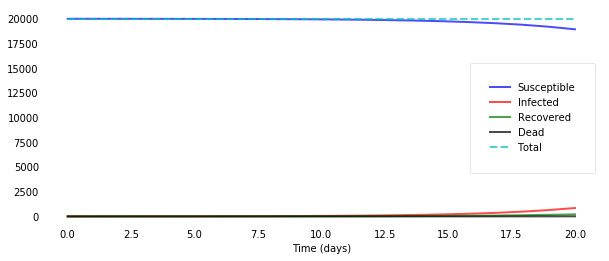

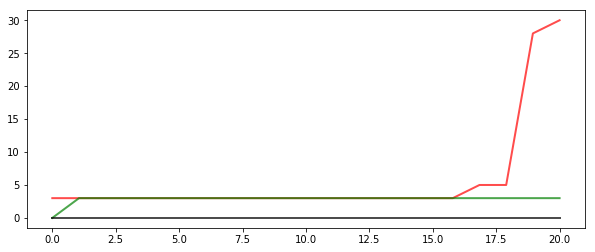

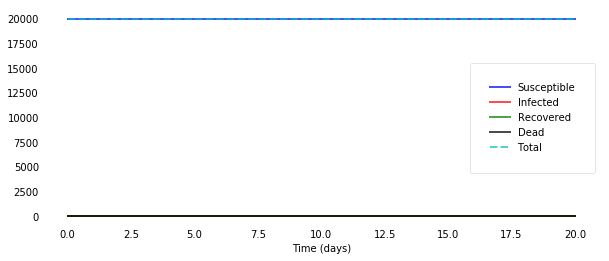

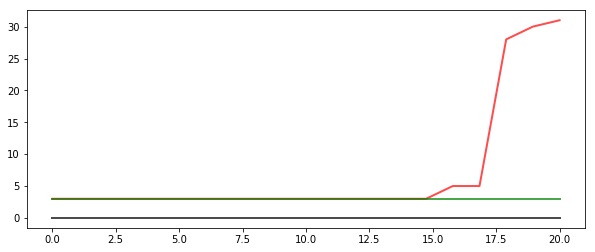

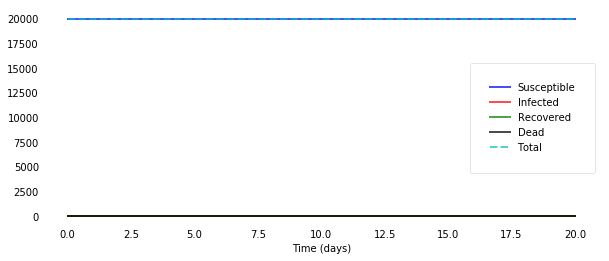

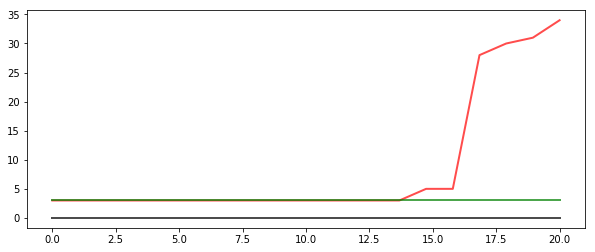

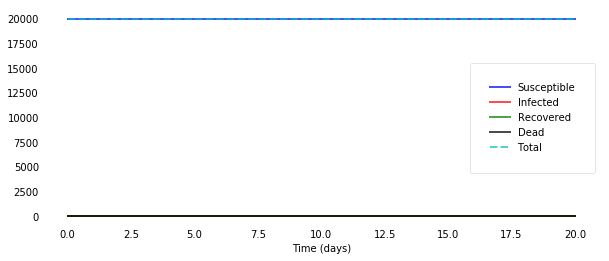

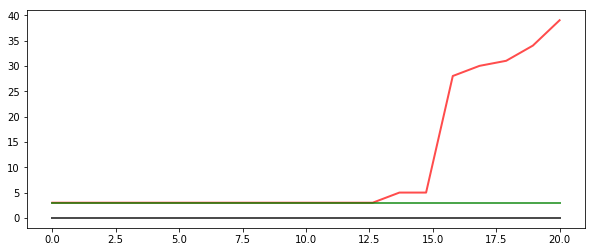

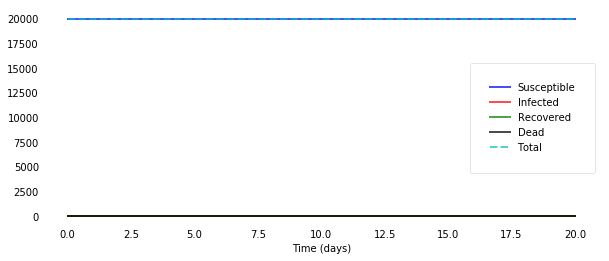

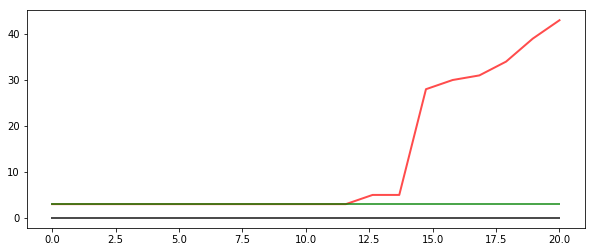

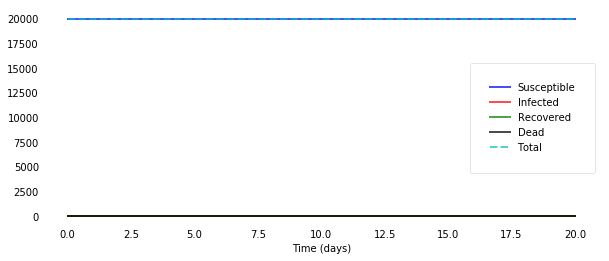

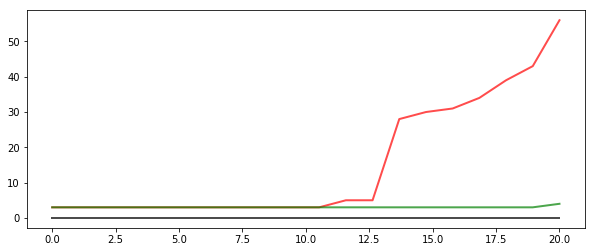

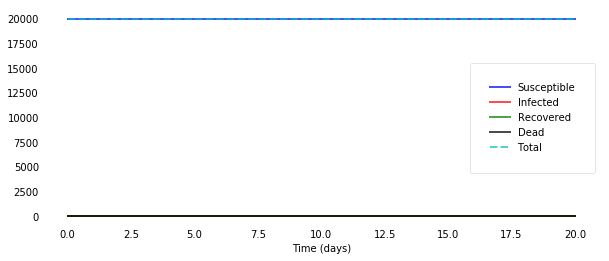

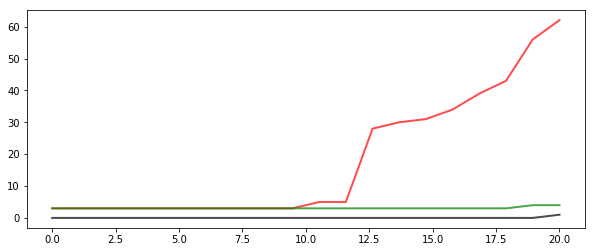

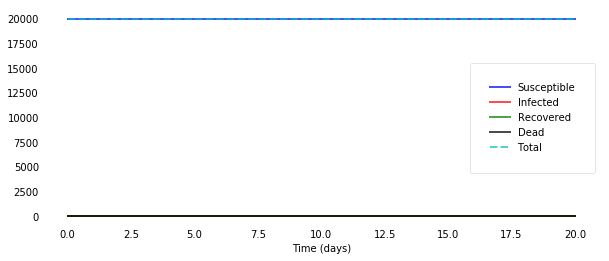

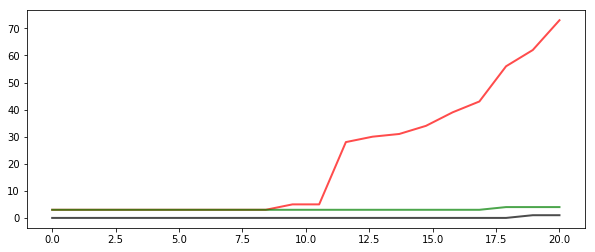

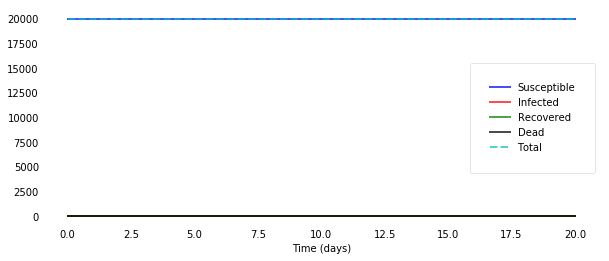

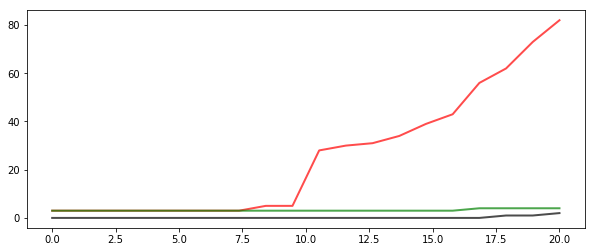

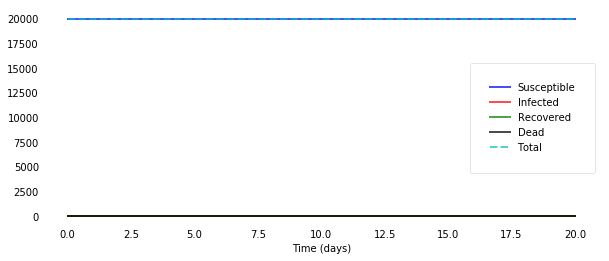

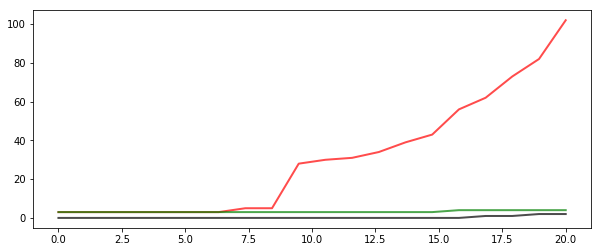

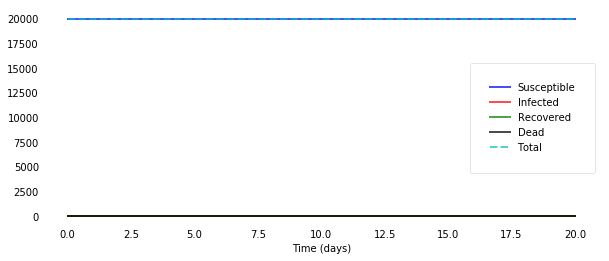

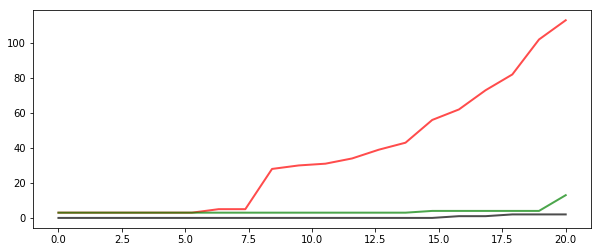

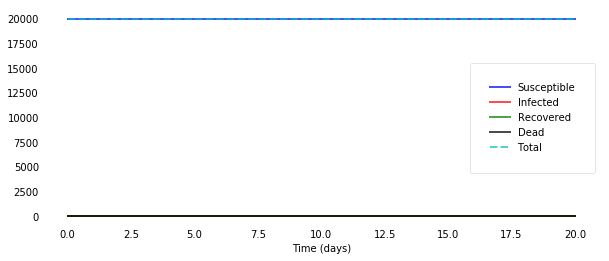

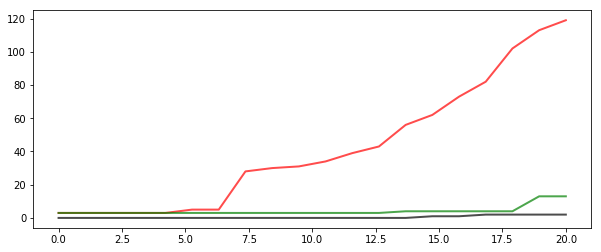

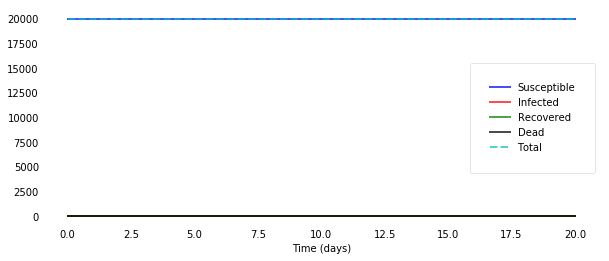

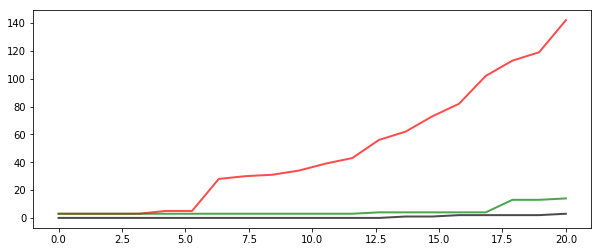

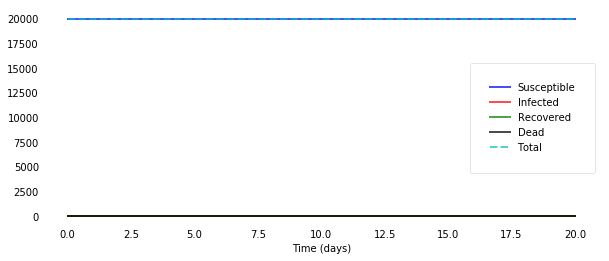

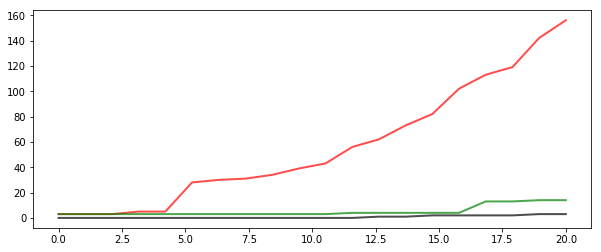

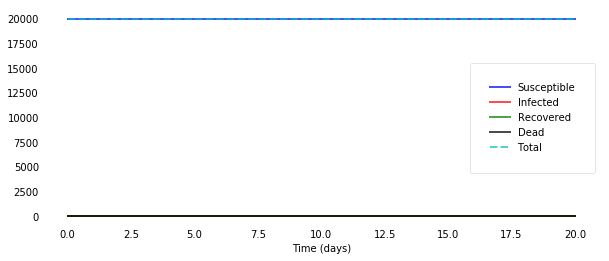

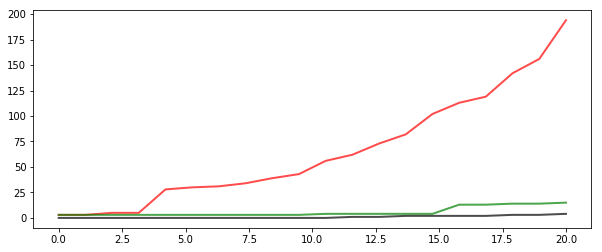

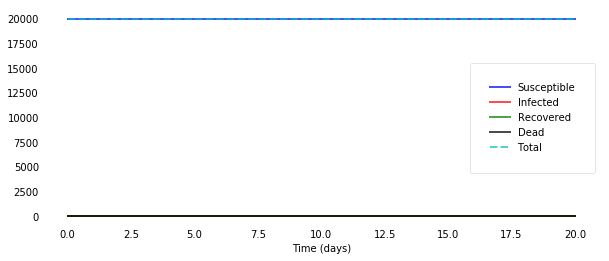

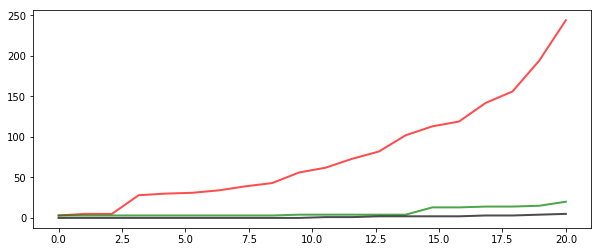

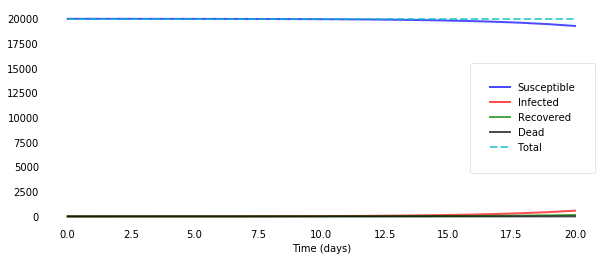

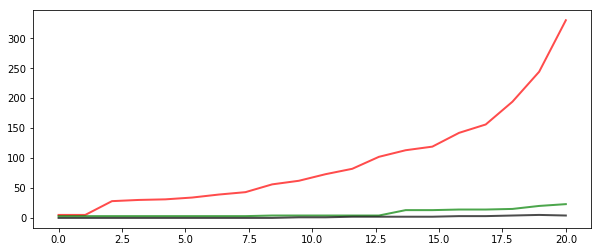

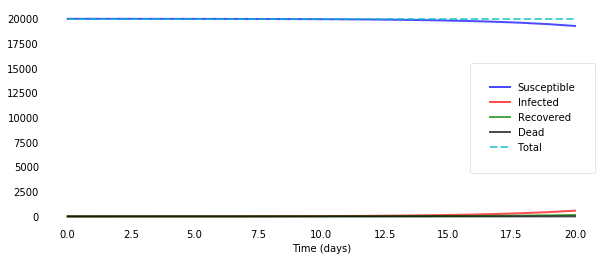

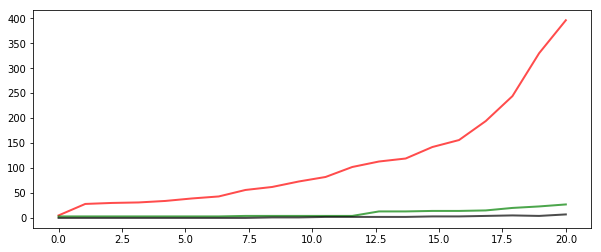

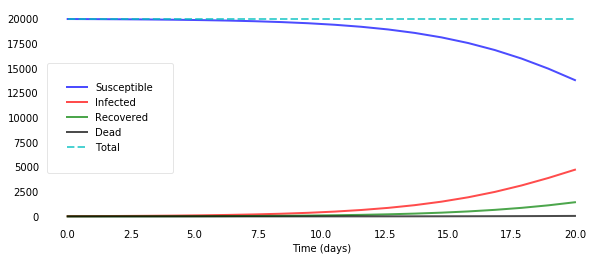

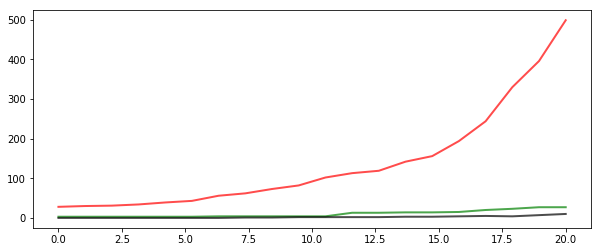

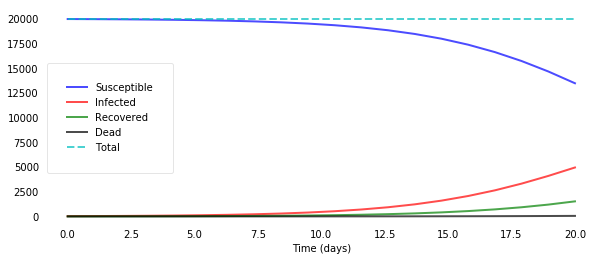

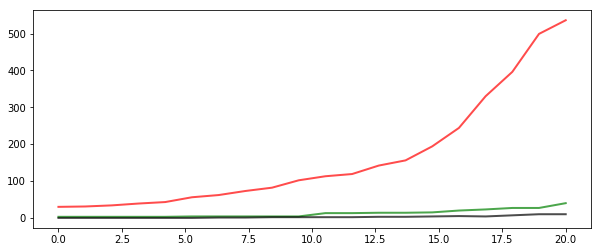

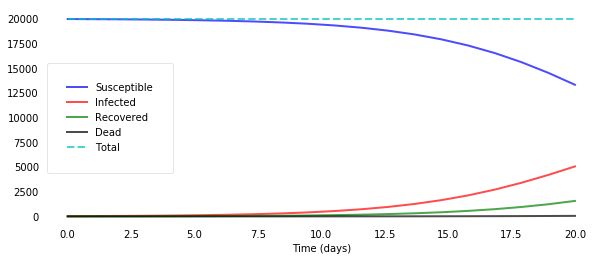

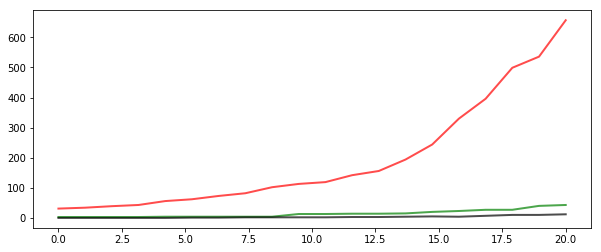

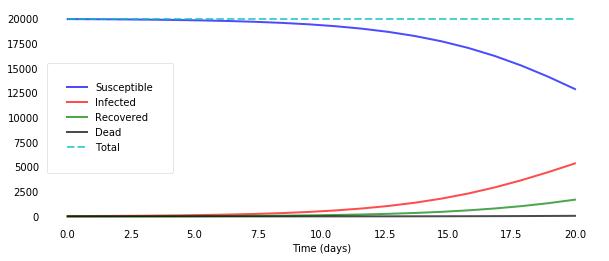

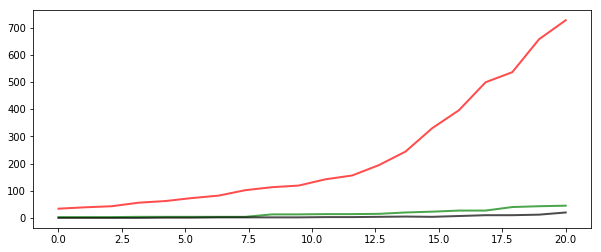

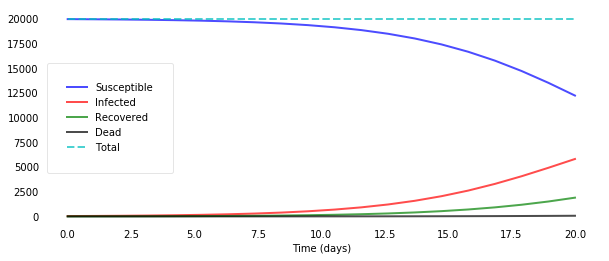

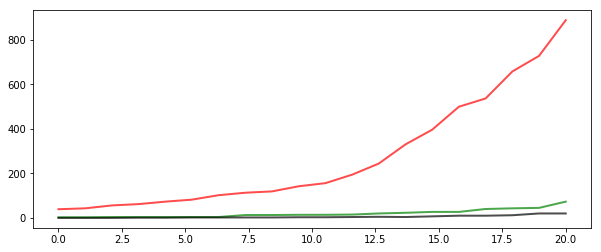

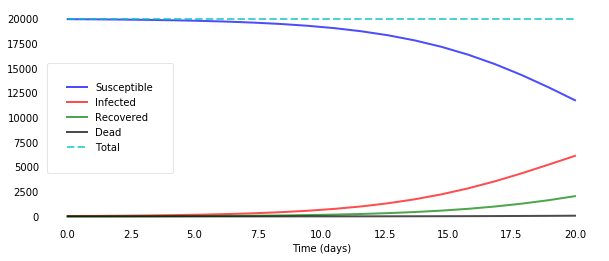

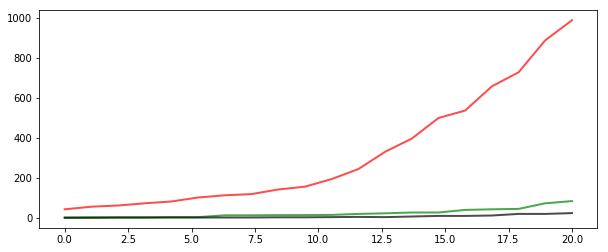

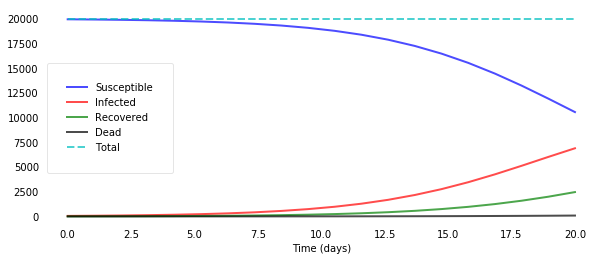

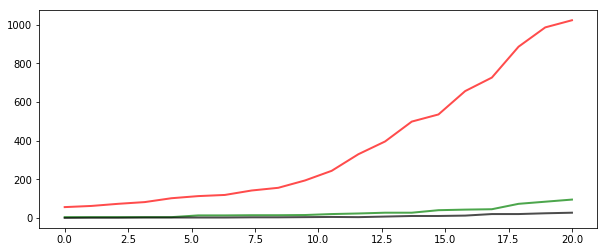

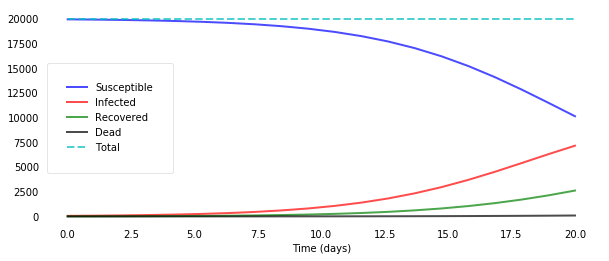

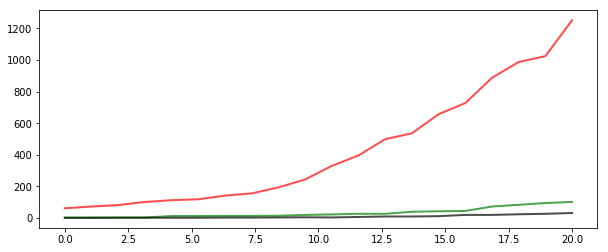

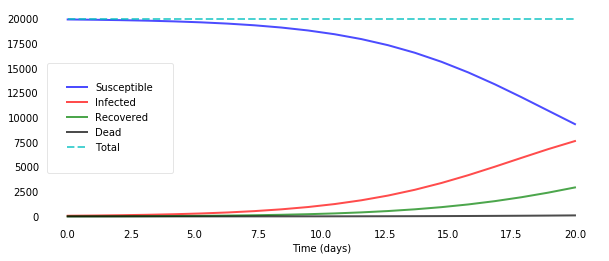

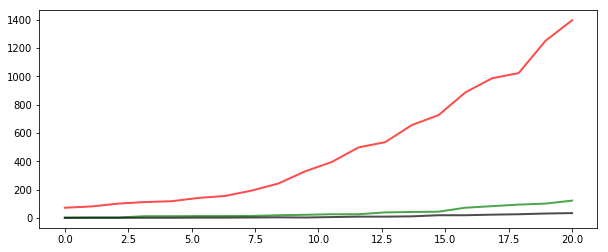

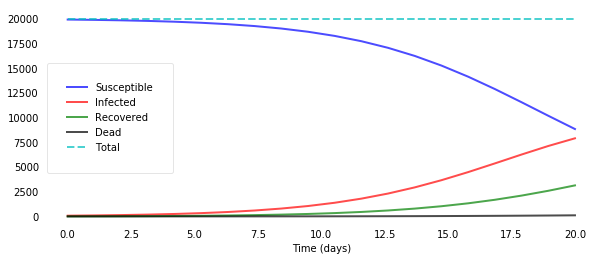

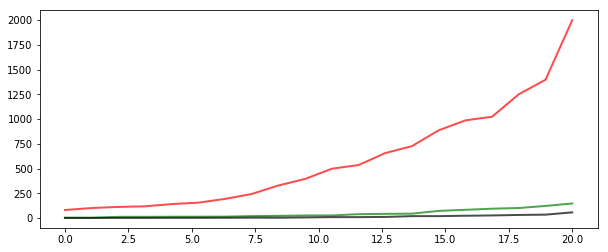

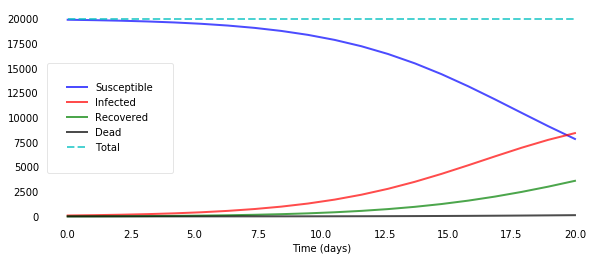

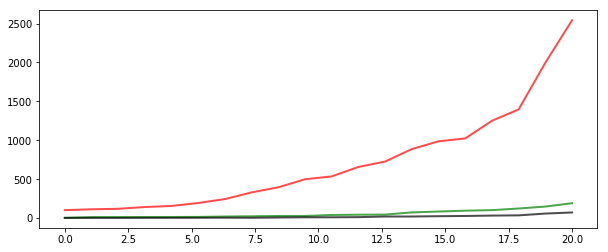

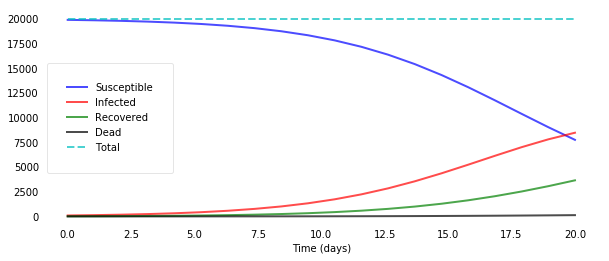

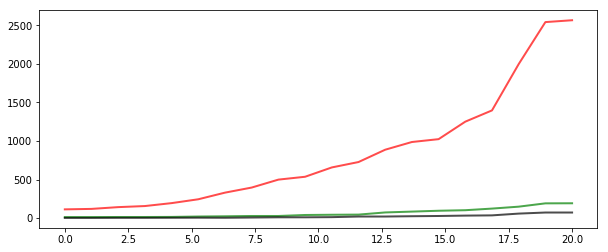

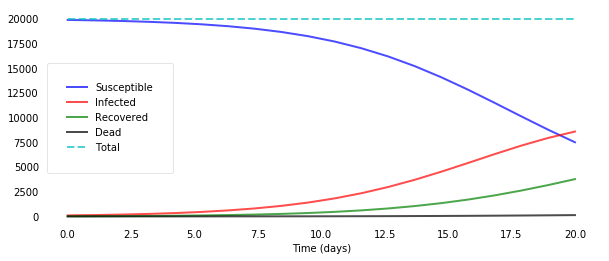

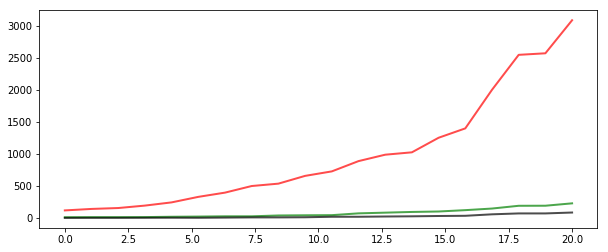

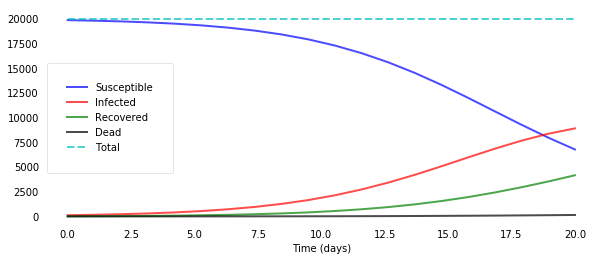

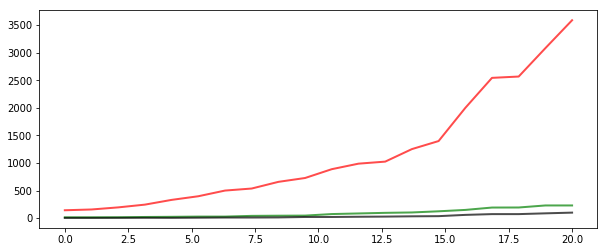

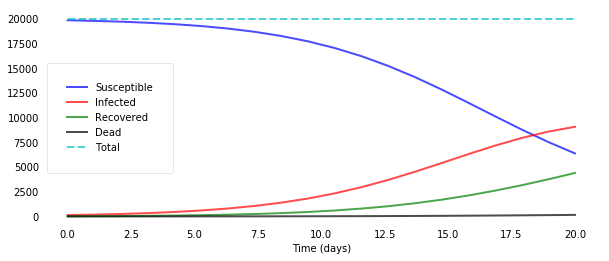

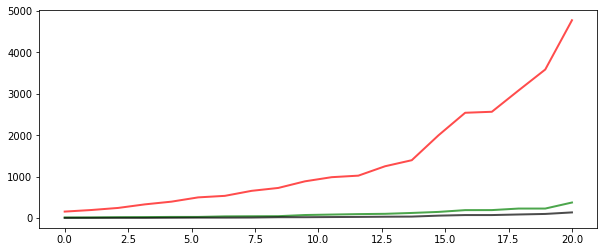

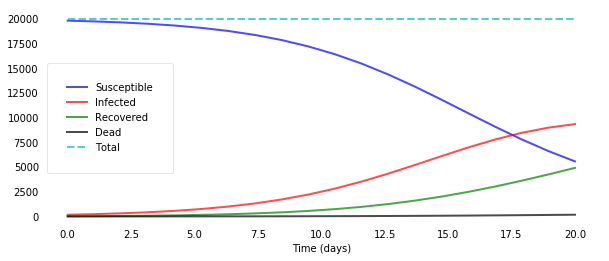

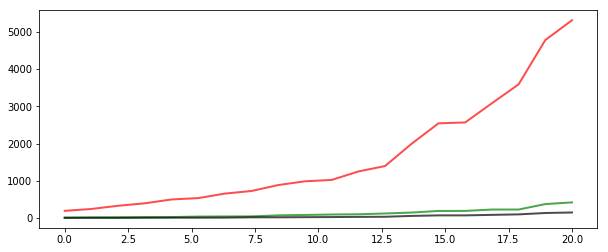

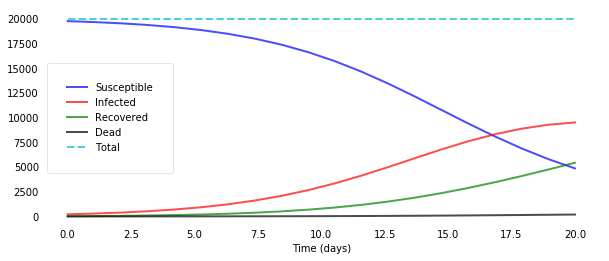

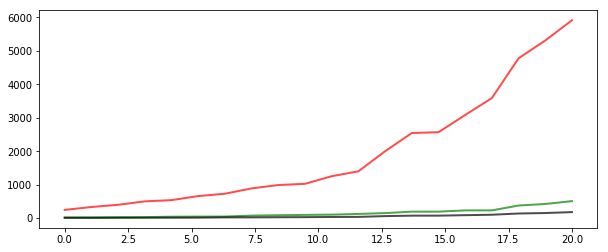

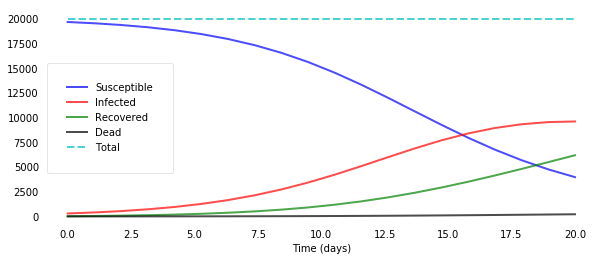

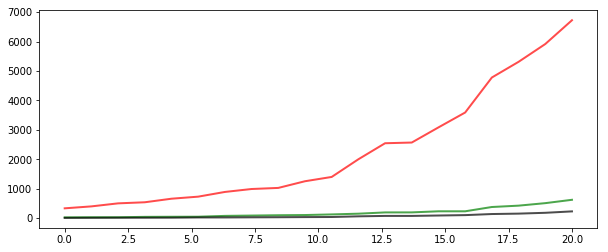

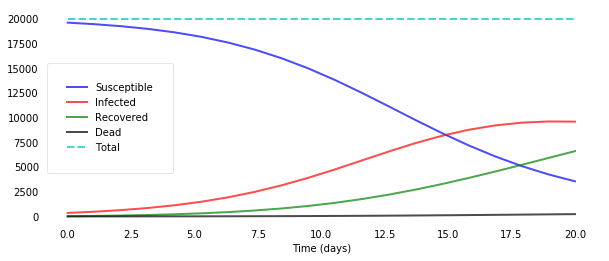

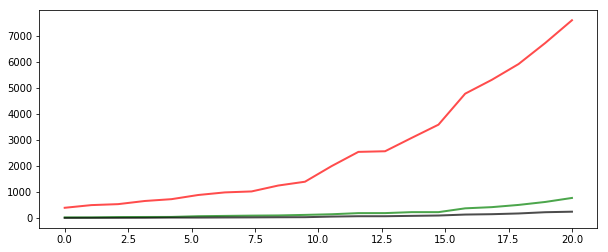

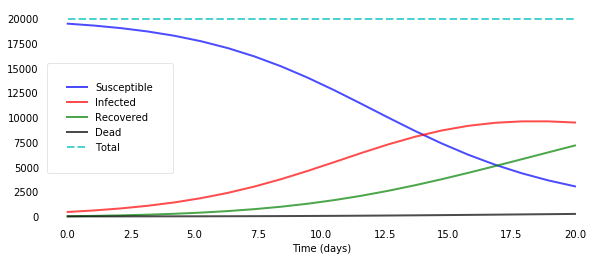

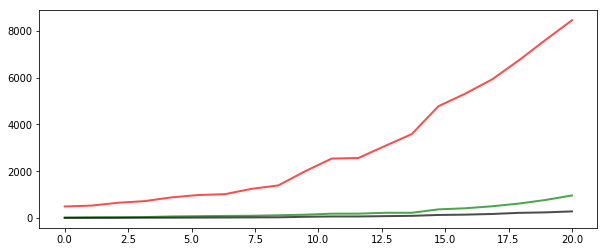

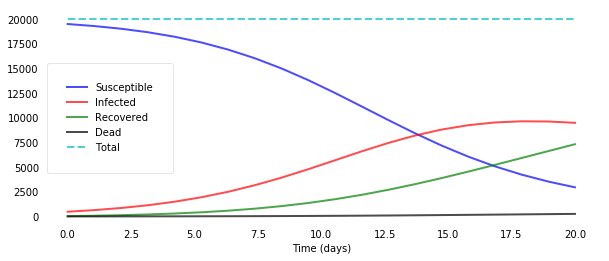

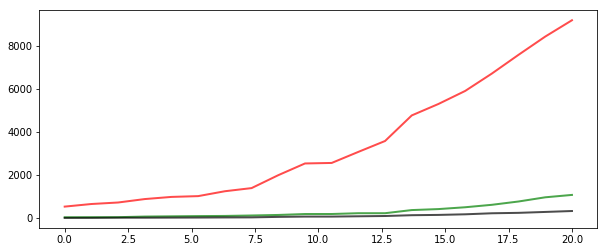

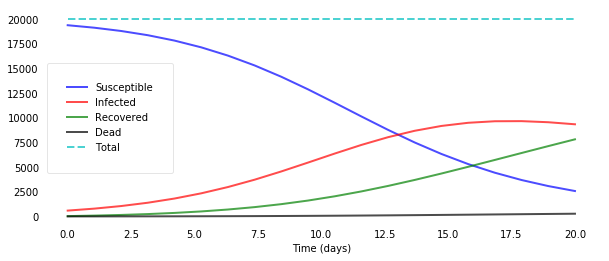

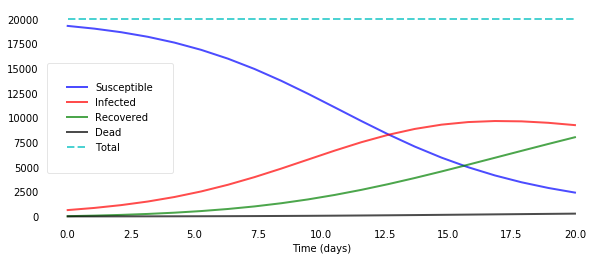

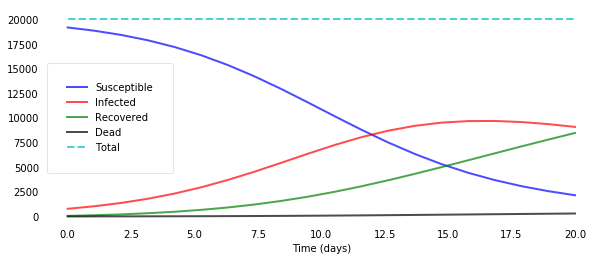

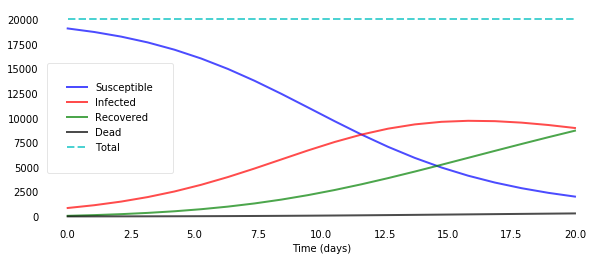

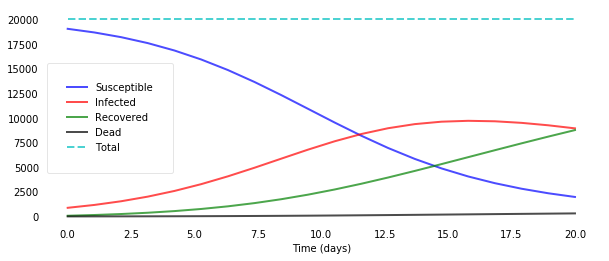

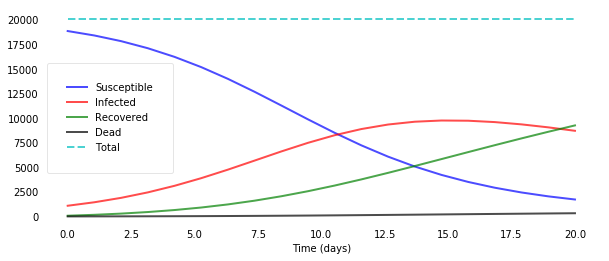

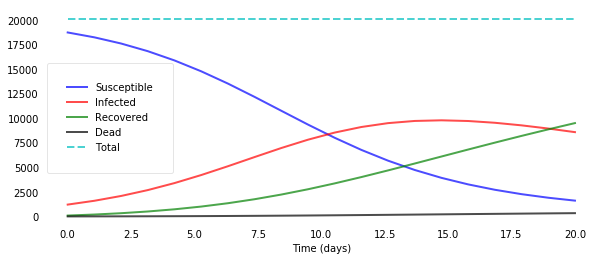

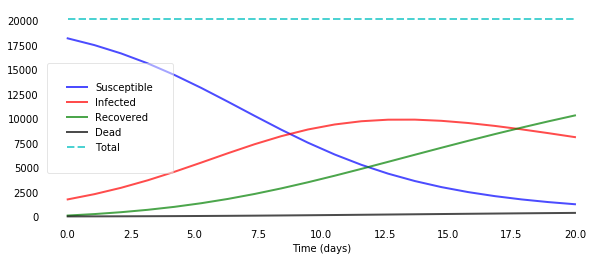

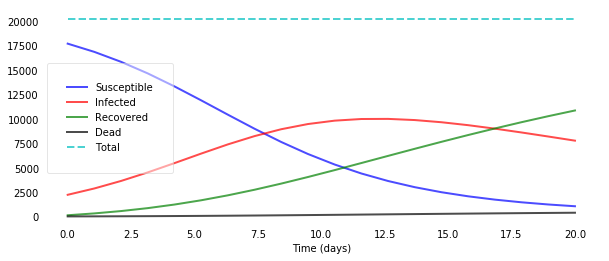

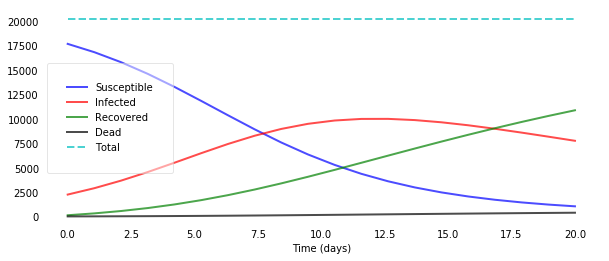

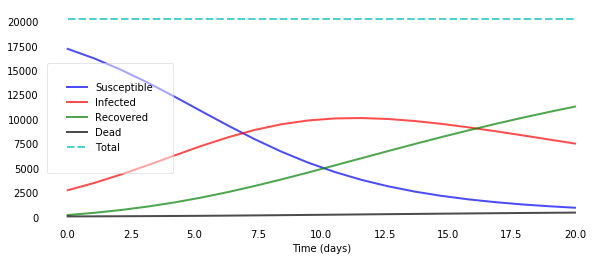

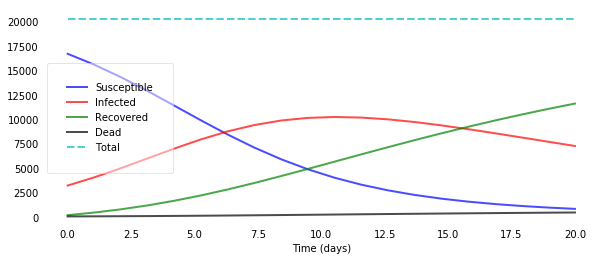

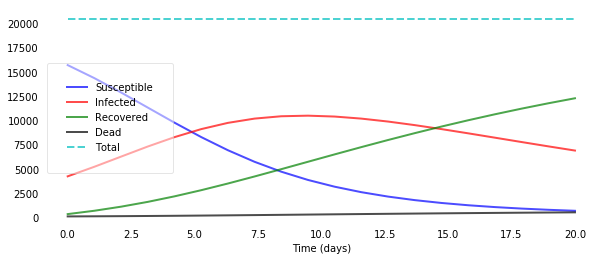

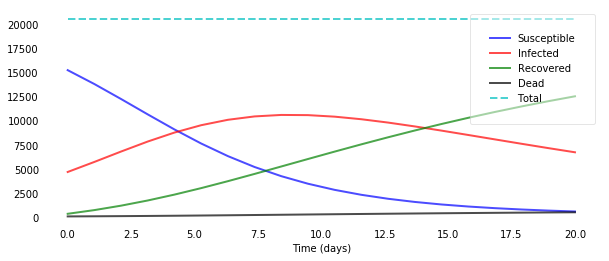

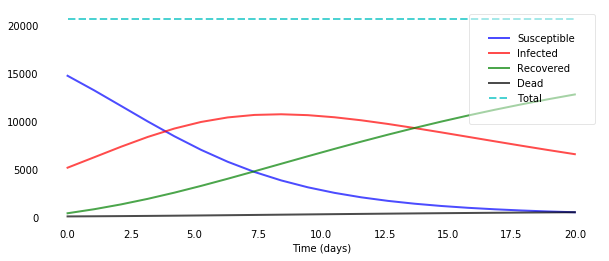

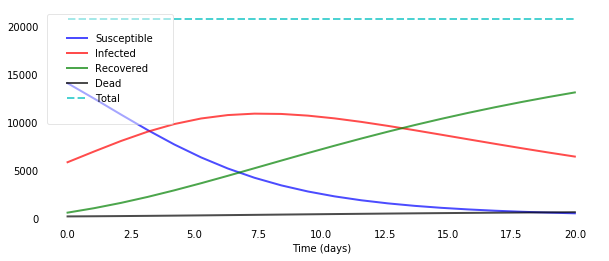

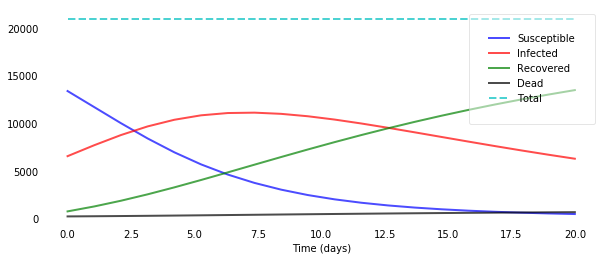

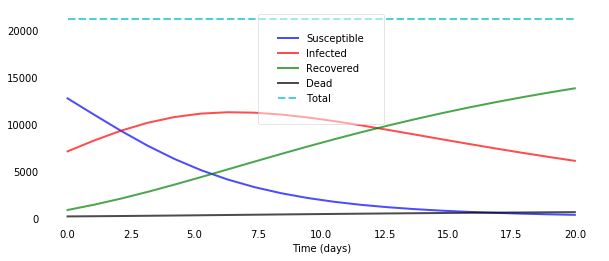

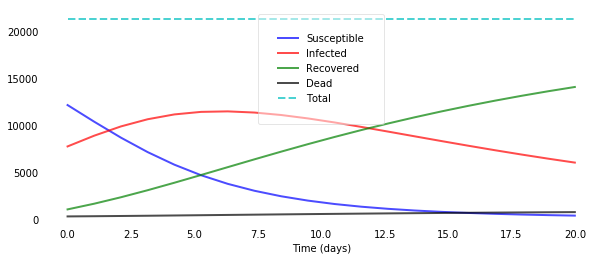

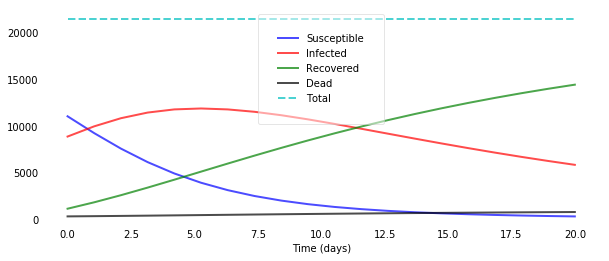

In [88]:
for i in range(0,len(df_con.iloc[:,0].values)):
    ep_model(int(df_con.values[i]),int(df_rec.values[i]),int(df_dth.values[i]))
    if (i+20)<len(df_con.values):
        plot_org(df_con.values[i:i+20],df_rec.values[i:i+20],df_dth.values[i:i+20])

In [89]:
int(df_con.values[0])

0

In [66]:
def plot_org(I,R,D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    #ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Death')
    plt.show()

In [60]:
t.shape

(80,)

# Predicting R0 values (Gradient Descent)

In [126]:
import pandas as pd
df_India= pd.read_csv("/home/dj/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_India=df_India.loc[df_India["Country/Region"]=="US"]

In [127]:
df_India=df_India.drop(axis=1, columns={"Province/State","Country/Region","Lat","Long"})
df_India=df_India.T

In [128]:
y= df_India[df_India.columns[0]].tolist()
x=range(len(y))

In [129]:
def error(a,b):
    error=0
    for i in x:
        error+= abs((a**(x[i]-b))- (y[i]))
    return error/len(x)
def get_error(a,b):
    error = 0
    for index in x:
        error += abs((a**(x[index]-b)) - (y[index]))
    return error / len(x)
global_err=[]
l1= 0.00005
l2= 0.00005
a=1
b=30

for itr in range(10000):
    b1= b + l1
    b2= b - l2
    if error(a,b1)< error(a,b2):
        b=b1
    else:
        b=b2
    a1= a + l1
    a2= a + l2
    if error(a1,b)<error(a2,b):
        a=a1
    else:
        a=a2
    global_err.append(error(a,b))
    if itr % 1000 == 0:
        print('Iterations {}'.format(itr))
        print("A: "+str(a), "B: "+str(b))
        print("Error: ", str(global_err[-1]),"\n")
        

Iterations 0
A: 1.00005 B: 29.99995
Error:  75640.48137685296 

Iterations 1000
A: 1.0500500000001056 B: 29.94994999999834
Error:  75638.32617955861 

Iterations 2000
A: 1.1000500000002111 B: 29.89994999999668
Error:  75622.44714375061 

Iterations 3000
A: 1.1500500000003167 B: 29.84994999999502
Error:  75506.03200265356 

Iterations 4000
A: 1.2000500000004222 B: 29.79994999999336
Error:  74657.03535414816 

Iterations 5000
A: 1.2500500000005277 B: 29.7499499999917
Error:  68654.60468937905 

Iterations 6000
A: 1.3000500000006332 B: 29.70114999999008
Error:  39859.17143527887 

Iterations 7000
A: 1.3500500000007387 B: 29.75114999999174
Error:  239896.16403499444 

Iterations 8000
A: 1.4000500000008442 B: 29.8011499999934
Error:  1718037.5426021868 

Iterations 9000
A: 1.4500500000009497 B: 29.85114999999506
Error:  10039738.858482214 



In [130]:
global_err[-1]

53900793.383745834

In [23]:
def get_error(a,b):
    error = 0
    for index in x:
        error += abs((a**(x[index]-b)) - (y[index]))
    return error / len(x)

a = 1
lr1 = 0.005
b = 30
lr2 = 0.005
iterations = 10_0000
global_mem = []
for iteration in range(iterations):
        
    b1 = b + lr2
    b2 = b - lr2
    if get_error(a,b1) < get_error(a,b2):
        b = b1
    else:
        b = b2
        
    a1 = a + lr1
    a2 = a - lr1
    if get_error(a1,b) < get_error(a2,b):
        a = a1
    else:
        a = a2
    global_mem.append(get_error(a,b))
    if iteration % 1_000 == 0:
        print('ITERATION {}'.format(iteration))
        print("{'A':"+str(a)+", 'B':"+str(b)+"}")
        print('Error:',global_mem[-1],'\n')

ITERATION 0
{'A':1.005, 'B':29.995}
Error: 993.6591561753488 

ITERATION 1000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 2000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 3000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 4000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 5000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 6000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 7000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 8000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 9000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 10000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 11000
{'A':1.194

ITERATION 90000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 91000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 92000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 93000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 94000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 95000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 96000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 97000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 98000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 

ITERATION 99000
{'A':1.1949999999999958, 'B':29.80500000000004}
Error: 199.73271351358443 



In [77]:
data= pd.read_csv("/home/dj/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

y = data[data['Country/Region']=='India'].sum().drop(['Province/State','Country/Region','Lat','Long']).tolist()
x = range(len(y))

In [78]:
def get_error_pso(A):
    error = 0
    for index in x:
        error += abs((A[0]**(x[index]-A[1])) - (y[index]))
    return error / len(x)


In [79]:
import random
class Particle:
    def __init__(self,x):
        self.cur_pos=[]
        self.cur_vel=[]
        self.best_pos=[]
        self.best_error=-1
        self.cur_error=-1
        for i in range(0,2):
            self.cur_vel.append( random.uniform(-1,1))
            self.cur_pos.append(x[i])
    def evaluate(self):
        self.cur_error= get_error_pso(self.cur_pos)
        if self.cur_error< self.best_error or self.best_error ==-1:
            self.best_pos= self.cur_pos
            self.best_error = self.cur_error
    def update_vel(self, best_vel_swarm):
        w=0.9
        c1=c2=2
        for i in range(0,2):
            r1=random.random()
            r2=random.random()
            v1= c1*r1 *(self.best_pos[i]- self.cur_pos[i])
            v2= c2*r2 *(best_vel_swarm[i]- self.cur_pos[i])
            self.cur_vel[i]= w*self.cur_vel[i] +v1 +v2
    def update_pos(self, bounds):
        for i in range(0,2):
            self.cur_pos[i]= self.cur_pos[i]+self.cur_vel[i]
            if self.cur_pos[i] > bounds[i][1]:
                self.cur_pos[i]=bounds[i][1]
            if self.cur_pos[i]<bounds[i][0]:
                self.cur_pos[i]=bounds[i][0]


In [82]:
class PSO:
    def __init__(self, x, bounds, num_particles, maxitera):
        self.error_best=-1
        self.pos_best=[]
        swarm=[]
        self.global_err=[]
        self.global_best=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x))
        for i in range(0,maxitera):
            x_p=[]
            y_p=[]
            for j in range(0,num_particles):
                swarm[j].evaluate()
                if swarm[j].cur_error < self.error_best or self.error_best==-1:
                    self.error_best= float(swarm[j].cur_error)
                    self.pos_best= list(swarm[j].cur_pos)
            for j in range(0,num_particles):
                swarm[j].update_vel(self.pos_best)
                swarm[j].update_pos(bounds)
                x_p.append(swarm[j].cur_pos[0])
                y_p.append(swarm[j].cur_pos[1])
#             plt.scatter(x_p,y_p)
#             display.clear_output(wait=True)
#             display.display(plt.gcf())
#             plt.clf()
#             time.sleep(1.0)
            self.global_err.append(self.error_best)
            self.global_bee
            print('Epoch: {0} | Best position: [{1},{2}] | Best known error: {3}'.format(i,self.pos_best[0],self.pos_best[1],self.error_best))
        print(self.pos_best)
        print(self.error_best)
        
    


In [81]:

initial=[1,30]               # initial starting
bounds=[(0.5,5),(0,30)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
pso=PSO(initial,bounds,num_particles=60,maxitera=1000)
R0= pso.pos_best[0]
global_err = pso.global_err
global_pos= pso.global_pos

AttributeError: 'PSO' object has no attribute 'global_mem'

In [61]:
y=y[len(y)-50:-1]
x= range(len(y))

In [76]:
global_err

[]

In [12]:


# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Import PySwarms
import pyswarms as ps

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
x=range(len(y))

def f(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [get_error_pso(x[i]) for i in range(n_particles)]
    return np.array(j)
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
dimensions = 2
bound= np.array([[1,5],[1,30]])
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=dimensions, options=options, bounds= bound)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=1000)

2020-04-23 19:27:40,520 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/1000, best_cost=994/home/dj/anaconda3/lib/python3.7/site-packages/pyswarms/backend/handlers.py:387: RuntimeWarning: invalid value encountered in remainder
  bound_d[greater_than_bound],
/home/dj/anaconda3/lib/python3.7/site-packages/pyswarms/backend/operators.py:66: RuntimeWarning: invalid value encountered in less
  mask_cost = swarm.current_cost < swarm.pbest_cost
pyswarms.single.global_best:   0%|          |0/1000, best_cost=994/home/dj/anaconda3/lib/python3.7/site-packages/pyswarms/backend/handlers.py:48: RuntimeWarning: invalid value encountered in greater
  greater_than_bound = np.nonzero(position > ub)
/home/dj/anaconda3/lib/python3.7/site-packages/pyswarms/backend/handlers.py:49: RuntimeWarning: invalid value encountered in less
  lower_than_bound = np.nonzero(position < lb)
pyswarms.single.global_best: 100%|

In [13]:
pos

array([ 1.        , 19.35341469])

In [161]:
help(optimizer)

Help on GlobalBestPSO in module pyswarms.single.global_best object:

class GlobalBestPSO(pyswarms.base.base_single.SwarmOptimizer)
 |  GlobalBestPSO(n_particles, dimensions, options, bounds=None, bh_strategy='periodic', velocity_clamp=None, vh_strategy='unmodified', center=1.0, ftol=-inf, init_pos=None)
 |  
 |  Helper class that provides a standard way to create an ABC using
 |  inheritance.
 |  
 |  Method resolution order:
 |      GlobalBestPSO
 |      pyswarms.base.base_single.SwarmOptimizer
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_particles, dimensions, options, bounds=None, bh_strategy='periodic', velocity_clamp=None, vh_strategy='unmodified', center=1.0, ftol=-inf, init_pos=None)
 |      Initialize the swarm
 |      
 |      Attributes
 |      ----------
 |      n_particles : int
 |          number of particles in the swarm.
 |      dimensions : int
 |          number of dimensions in the space.
 |      options : dict with 

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
def model(trainX, trainy):
    print(trainX.shape)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    model = Sequential()
    model.add(LSTM(units=4 , input_shape=(1,3)))
    model.add(Dense(units=1))
    model.compile(loss="mean_squared_error", optimizer='adam')
    model.fit(trainX,trainy, batch_size=1, epochs=500)
    return model
    

Using TensorFlow backend.
/home/dj/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dj/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dj/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dj/anaconda3/lib/python3.7/site-packages/tensorflow/python/fra

In [121]:
import pandas as pd
df_dth=pd.read_csv("/home/dj/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_con=pd.read_csv("/home/dj/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_rec=pd.read_csv("/home/dj/Downloads/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

df_con=df_con.loc[df_con["Country/Region"]=="India"]
df_rec=df_rec.loc[df_rec["Country/Region"]=="India"]
df_dth= df_dth.loc[df_dth["Country/Region"]=="India"]

df_con=df_con.drop(["Province/State","Country/Region","Lat","Long"], axis=1)
df_rec=df_rec.drop(["Province/State","Country/Region","Lat","Long"], axis=1)
df_dth=df_dth.drop(["Province/State","Country/Region","Lat","Long"], axis=1)

df_con=df_con.T
df_dth=df_dth.T
df_rec=df_rec.T

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


def data_spilt(data, orders, start):
    x_train = np.empty((len(data) - start - orders, orders))
    y_train = data[start + orders:]

    for i in range(len(data) - start - orders):
        x_train[i] = data[i + start:start + orders + i]

    # Exclude the day (Feb. 12, 2020) of the change of the definition of confirmed cases in Hubei China.
#     x_train = np.delete(x_train, np.s_[28 - (orders + 1) - start:28 - start], 0)
#     y_train = np.delete(y_train, np.s_[28 - (orders + 1) - start:28 - start])

    return x_train, y_train


def ridge(x, y):
    print('\nStart searching good parameters for the task...')
    parameters = {'alpha': np.arange(0, 0.100005, 0.000005).tolist(),
                  "tol": [1e-8],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]}

    clf = GridSearchCV(Ridge(), parameters, n_jobs=-1, cv=5)
    clf.fit(x, y)

    print('\nResults for the parameters grid search:')
    print('Model:', clf.best_estimator_)
    print('Score:', clf.best_score_)

    return clf


X_cml= df_con.values
X_cml=X_cml.reshape((1,-1))[0]
X_cml=X_cml[X_cml != 0]
#X_cml=X_cml[:-1]
# recovered = cumulative recovered cases
recovered= df_rec.values
recovered=recovered.reshape((1,-1))[0]
recovered=recovered[recovered != 0]
#recovered=recovered[:-1]
# death = cumulative deaths
#death = np.array([2, 3, 3, 3, 4, 6, 9, 18, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 491, 564, 637, 723, 812, 909, 1017, 1114, 1368, 1381, 1524, 1666, 1772, 1870, 2006, 2121, 2239, 2348, 2445, 2595, 2666, 2718, 2747, 2791, 2838, 2873, 2915, 2946, 2984, 3015, 3045, 3073, 3100, 3123, 3140, 3162, 3173, 3180, 3194, 3204, 3218, 3231, 3242, 3250, 3253, 3261, 3267, 3276, 3283, 3287, 3293, 3298, 3301, 3306, 3311, 3314, 3321, 3327, 3331, 3335, 3338, 3340, 3340, 3342, 3344], dtype=np.float64)[:-27]
death= df_dth.values
death= death.reshape((1,-1))[0]
death= death[death!= 0]
#death=death[:-1]
recovered=recovered[len(recovered)-len(death):]
X_cml= X_cml[len(X_cml)-len(death):]
population =  1380004385
########## data preprocess ##########
def SIR(X_cml, recovered, death, population):
    X = X_cml - recovered - death
    R = recovered + death

    n = np.array([population] * len(X), dtype=np.float64)

    S = n - X - R

    X_diff = np.array([X[:-1], X[1:]], dtype=np.float64).T
    R_diff = np.array([R[:-1], R[1:]], dtype=np.float64).T

    gamma = (R[1:] - R[:-1]) / X[:-1]
    beta = n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1]))
    R0 = beta / gamma

    ########## Parameters for Ridge Regression ##########
    ##### Orders of the two FIR filters in (12), (13) in the paper. #####
    orders_beta = 3
    orders_gamma = 3

    ##### Select a starting day for the data training in the ridge regression. #####
    start_beta = 10
    start_gamma = 10

    ########## Print Info ##########
    print("\nThe latest transmission rate beta of SIR model:", beta[-1])
    print("The latest recovering rate gamma of SIR model:", gamma[-1])
    print("The latest basic reproduction number R0:", R0[-1])

    ########## Ridge Regression ##########
    ##### Split the data to the training set and testing set #####
    x_beta, y_beta = data_spilt(beta, orders_beta, start_beta)
    x_gamma, y_gamma = data_spilt(gamma, orders_gamma, start_gamma)

    ##### Searching good parameters #####
#     clf_beta = ridge(x_beta, y_beta)
#     clf_gamma = ridge(x_gamma, y_gamma)

    #### Training and Testing #####
    clf_beta = Ridge(alpha=0.003765, copy_X=True, fit_intercept=False, max_iter=None, normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_beta, y_beta)
    clf_gamma = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_gamma, y_gamma)

#     clf_beta= model(x_beta,y_beta)
    
#     clf_gamma=model(x_gamma,y_gamma)
    beta_hat = clf_beta.predict(x_beta)
#     beta_hat= clf_beta.predict(np.reshape(x_beta, (x_beta.shape[0], 1, x_beta.shape[1]))) 
   
    gamma_hat = clf_gamma.predict(x_gamma)
#     gamma_hat= clf_gamma.predict(np.reshape(x_gamma, (x_gamma.shape[0], 1, x_gamma.shape[1])))
    
    ##### Plot the training and testing results #####
    plt.figure(1)
    plt.plot(y_beta, label=r'$\beta (t)$')
    plt.plot(beta_hat, label=r'$\hat{\beta}(t)$')
    plt.legend()

    plt.figure(2)
    plt.plot(y_gamma, label=r'$\gamma (t)$')
    plt.plot(gamma_hat, label=r'$\hat{\gamma}(t)$')
    plt.legend()

    ########## Time-dependent SIR model ##########

    ##### Parameters for the Time-dependent SIR model #####
    stop_X = 0 # stopping criteria
    stop_day = 100 # maximum iteration days (W in the paper)

    day_count = 0
    turning_point = 0

    S_predict = [S[-1]]
    X_predict = [X[-1]]
    R_predict = [R[-1]]

    predict_beta = np.array(beta[-orders_beta:]).tolist()
    predict_gamma = np.array(gamma[-orders_gamma:]).tolist()
    while (X_predict[-1] >= stop_X) and (day_count <= stop_day):
        if predict_beta[-1] > predict_gamma[-1]:
            turning_point += 1

        next_beta = clf_beta.predict(np.asarray([predict_beta[-orders_beta:]]))[0]
#         next_beta = clf_beta.predict(np.reshape(np.asarray([predict_beta[-orders_beta:]]),(np.asarray([predict_beta[-orders_beta:]]).shape[0],1,np.asarray([predict_beta[-orders_beta:]]).shape[1])))[0]
        next_gamma = clf_gamma.predict(np.asarray([predict_gamma[-orders_gamma:]]))[0]
#         next_gamma = clf_gamma.predict(np.reshape(np.asarray([predict_gamma[-orders_gamma:]]),(np.asarray([predict_gamma[-orders_gamma:]]).shape[0],1,np.asarray([predict_gamma[-orders_gamma:]]).shape[1])))[0]

        if next_beta < 0:
            next_beta = 0
        if next_gamma < 0:
            next_gamma = 0

        predict_beta.append(next_beta)
        predict_gamma.append(next_gamma)

        next_S = ((-predict_beta[-1] * S_predict[-1] *
                   X_predict[-1]) / n[-1]) + S_predict[-1]
        next_X = ((predict_beta[-1] * S_predict[-1] * X_predict[-1]) /
                  n[-1]) - (predict_gamma[-1] * X_predict[-1]) + X_predict[-1]
        next_R = (predict_gamma[-1] * X_predict[-1]) + R_predict[-1]

        S_predict.append(next_S)
        X_predict.append(next_X)
        R_predict.append(next_R)

        day_count += 1

    ########## Print Info ##########
    print('\nConfirmed cases tomorrow:', np.rint(X_predict[1] + R_predict[1]))
    print('Infected persons tomorrow:', np.rint(X_predict[1]))
    print('Recovered + Death persons tomorrow:', np.rint(R_predict[1]))

    print('\nEnd day:', day_count)
    print('Confirmed cases on the end day:', np.rint(X_predict[-2] + R_predict[-2]))

    print('\nTuring point:', turning_point)

    ########## Plot the time evolution of the time-dependent SIR model ##########
    plt.figure(3)
    plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), X_predict, '*-', label=r'$\hat{X}(t)$', color='darkorange')
    plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, '*-', label=r'$\hat{R}(t)$', color='limegreen')
    plt.plot(range(len(X)), X, 'o--', label=r'$X(t)$', color='chocolate')
    plt.plot(range(len(X)), R, 'o--', label=r'$R(t)$', color='darkgreen')
    plt.xlabel('Day')
    plt.ylabel('Person')
    plt.title('Time evolution of the time-dependent SIR model.')

    plt.legend()

    plt.show()


/home/dj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in true_divide



The latest transmission rate beta of SIR model: 0.08233160545359478
The latest recovering rate gamma of SIR model: 0.03278856498796045
The latest basic reproduction number R0: 2.5109853232011194

Confirmed cases tomorrow: 29477.0
Infected persons tomorrow: 21509.0
Recovered + Death persons tomorrow: 7968.0

End day: 101
Confirmed cases on the end day: 62022.0

Turing point: 32


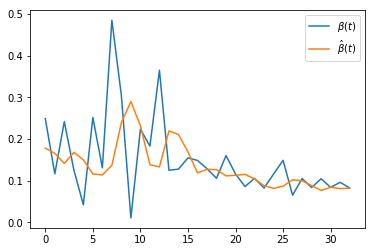

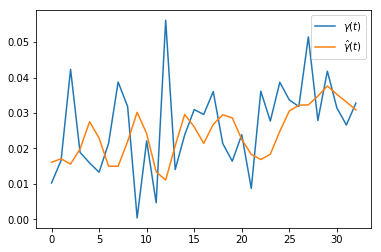

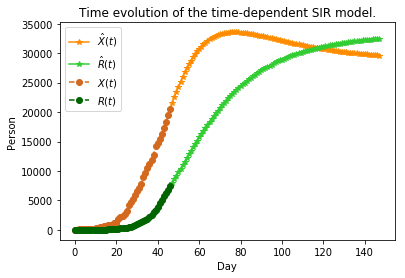

In [5]:
SIR(X_cml, recovered, death, population)

In [6]:
df_rec

125
1/22/20     0
1/23/20     0
1/24/20     0
1/25/20     0
1/26/20     0
1/27/20     0
1/28/20     0
1/29/20     0
1/30/20     0
1/31/20     0
2/1/20      0
2/2/20      0
2/3/20      0
2/4/20      0
2/5/20      0
2/6/20      0
2/7/20      0
2/8/20      0
2/9/20      0
2/10/20     0
2/11/20     0
2/12/20     0
2/13/20     0
2/14/20     0
2/15/20     0
2/16/20     3
2/17/20     3
2/18/20     3
2/19/20     3
2/20/20     3
...       ...
3/28/20    84
3/29/20    95
3/30/20   102
3/31/20   123
4/1/20    148
4/2/20    191
4/3/20    192
4/4/20    229
4/5/20    229
4/6/20    375
4/7/20    421
4/8/20    506
4/9/20    620
4/10/20   774
4/11/20   969
4/12/20  1080
4/13/20  1181
4/14/20  1359
4/15/20  1432
4/16/20  1768
4/17/20  2041
4/18/20  2463
4/19/20  2854
4/20/20  3273
4/21/20  3975
4/22/20  4370
4/23/20  5012
4/24/20  5498
4/25/20  5939
4/26/20  6523

[96 rows x 1 columns]

In [7]:
# adding death

In [117]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

import datetime
inf=[]
rec=[]
dth=[]
dates=list(df_dth.loc[(df_dth!=0).all(axis=1)].index)
base = datetime.datetime.strptime(dates[-1], "%m/%d/%y")




def data_spilt(data, orders, start):
    x_train = np.empty((len(data) - start - orders, orders))
    y_train = data[start + orders:]

    for i in range(len(data) - start - orders):
        x_train[i] = data[i + start:start + orders + i]

    # Exclude the day (Feb. 12, 2020) of the change of the definition of confirmed cases in Hubei China.
#     x_train = np.delete(x_train, np.s_[28 - (orders + 1) - start:28 - start], 0)
#     y_train = np.delete(y_train, np.s_[28 - (orders + 1) - start:28 - start])

    return x_train, y_train


def ridge(x, y):
    print('\nStart searching good parameters for the task...')
    parameters = {'alpha': np.arange(0, 0.100005, 0.000005).tolist(),
                  "tol": [1e-8],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]}

    clf = GridSearchCV(Ridge(), parameters, n_jobs=-1, cv=5)
    clf.fit(x, y)

    print('\nResults for the parameters grid search:')
    print('Model:', clf.best_estimator_)
    print('Score:', clf.best_score_)

    return clf


X_cml= df_con.values
X_cml=X_cml.reshape((1,-1))[0]
X_cml=X_cml[X_cml != 0]
#X_cml=X_cml[:-1]
# recovered = cumulative recovered cases
recovered= df_rec.values
recovered=recovered.reshape((1,-1))[0]
recovered=recovered[recovered != 0]
#recovered=recovered[:-1]
# death = cumulative deaths
#death = np.array([2, 3, 3, 3, 4, 6, 9, 18, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 491, 564, 637, 723, 812, 909, 1017, 1114, 1368, 1381, 1524, 1666, 1772, 1870, 2006, 2121, 2239, 2348, 2445, 2595, 2666, 2718, 2747, 2791, 2838, 2873, 2915, 2946, 2984, 3015, 3045, 3073, 3100, 3123, 3140, 3162, 3173, 3180, 3194, 3204, 3218, 3231, 3242, 3250, 3253, 3261, 3267, 3276, 3283, 3287, 3293, 3298, 3301, 3306, 3311, 3314, 3321, 3327, 3331, 3335, 3338, 3340, 3340, 3342, 3344], dtype=np.float64)[:-27]
death= df_dth.values
death= death.reshape((1,-1))[0]
death= death[death!= 0]
#death=death[:-1]

recovered=recovered[len(recovered)-len(death):]
X_cml= X_cml[len(X_cml)-len(death):]
population =  1380004385
########## data preprocess ##########
def SIR(X_cml, recovered, death, population):
    X = X_cml - recovered - death
    R = recovered
    D= death

    n = np.array([population] * len(X), dtype=np.float64)

    S = n - X - R
    rho= 1/14

    X_diff = np.array([X[:-1], X[1:]], dtype=np.float64).T
    R_diff = np.array([R[:-1], R[1:]], dtype=np.float64).T
    D_diff= np.array([D[:-1],D[1:]], dtype=np.float64).T
    alpha= (D[1:]-D[:-1])/(rho*X[:-1])
    gamma = (R[1:] - R[:-1]) / (X[:-1]* (1-alpha))
    beta = n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]+ D[1:]- D[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1] -D[:-1]))
    R0 = beta / gamma

    ########## Parameters for Ridge Regression ##########
    ##### Orders of the two FIR filters in (12), (13) in the paper. #####
    orders_beta = 3
    orders_gamma = 3
    orders_alpha=3

    ##### Select a starting day for the data training in the ridge regression. #####
    start_beta = 10
    start_gamma = 10
    start_alpha=10
    ########## Print Info ##########
    print("\nThe latest transmission rate beta of SIR model:", beta[-1])
    print("The latest recovering rate gamma of SIR model:", gamma[-1])
    print("The latest mortality rate alpha of SIR model:", alpha[-1])
    print("The latest basic reproduction number R0:", R0[-1])

    ########## Ridge Regression ##########
    ##### Split the data to the training set and testing set #####
    x_beta, y_beta = data_spilt(beta, orders_beta, start_beta)
    x_gamma, y_gamma = data_spilt(gamma, orders_gamma, start_gamma)
    x_alpha,y_alpha= data_spilt(alpha, orders_alpha,start_alpha)

    ##### Searching good parameters #####
#     clf_beta = ridge(x_beta, y_beta)
#     clf_gamma = ridge(x_gamma, y_gamma)

    #### Training and Testing #####
    clf_beta = Ridge(alpha=0.003765, copy_X=True, fit_intercept=False, max_iter=None, normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_beta, y_beta)
    clf_gamma = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_gamma, y_gamma)
    clf_alpha = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_alpha, y_alpha)

#     clf_beta= model(x_beta,y_beta)
    
#     clf_gamma=model(x_gamma,y_gamma)
    beta_hat = clf_beta.predict(x_beta)
#     beta_hat= clf_beta.predict(np.reshape(x_beta, (x_beta.shape[0], 1, x_beta.shape[1]))) 
   
    gamma_hat = clf_gamma.predict(x_gamma)
    alpha_hat=  clf_alpha.predict(x_alpha)
#     gamma_hat= clf_gamma.predict(np.reshape(x_gamma, (x_gamma.shape[0], 1, x_gamma.shape[1])))
    
    ##### Plot the training and testing results #####
    plt.figure(1)
    plt.plot(y_beta, label=r'$\beta (t)$')
    plt.plot(beta_hat, label=r'$\hat{\beta}(t)$')
    plt.legend()

    plt.figure(2)
    plt.plot(y_gamma, label=r'$\gamma (t)$')
    plt.plot(gamma_hat, label=r'$\hat{\gamma}(t)$')
    plt.legend()
    
    plt.figure(3)
    plt.plot(y_alpha, label=r'$\alpha (t)$')
    plt.plot(alpha_hat, label=r'$\hat{\alpha}(t)$')
    plt.legend()


    ########## Time-dependent SIR model ##########

    ##### Parameters for the Time-dependent SIR model #####
    stop_X = 0 # stopping criteria
    stop_day = 100 # maximum iteration days (W in the paper)

    day_count = 0
    turning_point = 0

    S_predict = [S[-1]]
    X_predict = [X[-1]]
    R_predict = [R[-1]]
    D_predict= [D[-1]]

    predict_beta = np.array(beta[-orders_beta:]).tolist()
    predict_gamma = np.array(gamma[-orders_gamma:]).tolist()
    predict_alpha=  np.array(alpha[-orders_alpha:]).tolist()
    while (X_predict[-1] >= stop_X) and (day_count <= stop_day):
        if predict_beta[-1] > predict_gamma[-1]:
            turning_point += 1

        next_beta = clf_beta.predict(np.asarray([predict_beta[-orders_beta:]]))[0]
#         next_beta = clf_beta.predict(np.reshape(np.asarray([predict_beta[-orders_beta:]]),(np.asarray([predict_beta[-orders_beta:]]).shape[0],1,np.asarray([predict_beta[-orders_beta:]]).shape[1])))[0]
        next_gamma = clf_gamma.predict(np.asarray([predict_gamma[-orders_gamma:]]))[0]
#         next_gamma = clf_gamma.predict(np.reshape(np.asarray([predict_gamma[-orders_gamma:]]),(np.asarray([predict_gamma[-orders_gamma:]]).shape[0],1,np.asarray([predict_gamma[-orders_gamma:]]).shape[1])))[0]
        next_alpha = clf_alpha.predict(np.asarray([predict_alpha[-orders_alpha:]]))[0]
        if next_beta < 0:
            next_beta = 0
        if next_gamma < 0:
            next_gamma = 0
        if next_alpha < 0:
            next_alpha = 0
            

        predict_beta.append(next_beta)
        predict_gamma.append(next_gamma)
        predict_alpha.append(next_alpha)

        next_S = ((-predict_beta[-1] * S_predict[-1] *
                   X_predict[-1]) / n[-1]) + S_predict[-1]
        next_X = ((predict_beta[-1] * S_predict[-1] * X_predict[-1]) /
                  n[-1]) - ((1-predict_alpha[-1])* predict_gamma[-1] * X_predict[-1]) - (predict_alpha[-1] * rho * X_predict[-1]) + X_predict[-1]
        next_R = ((1-predict_alpha[-1])*predict_gamma[-1] * X_predict[-1]) + R_predict[-1]
        next_D= (predict_alpha[-1] *rho * X_predict[-1])+ D_predict[-1]
        S_predict.append(next_S)
        X_predict.append(next_X)
        R_predict.append(next_R)
        D_predict.append(next_D)

        day_count += 1

    ########## Print Info ##########
    print('\nConfirmed cases tomorrow:', np.rint(X_predict[1] + R_predict[1]+ D_predict[1]))
    print('Infected persons tomorrow:', np.rint(X_predict[1]))
    print('Recovered persons tomorrow:', np.rint(R_predict[1]))
    print('Death persons tomorrow:', np.rint(D_predict[1]))

    print('\nEnd day:', day_count)
    print('Confirmed cases on the end day:', np.rint(X_predict[-2] + R_predict[-2]))

    print('\nTuring point:', turning_point)

    ########## Plot the time evolution of the time-dependent SIR model ##########
    plt.figure(4)
    plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), X_predict, '*-', label=r'$\hat{X}(t)$', color='darkorange')
    plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, '*-', label=r'$\hat{R}(t)$', color='limegreen')
    
    
    plt.plot(range(len(X)), X, 'o--', label=r'$X(t)$', color='chocolate')
    plt.plot(range(len(X)), R, 'o--', label=r'$R(t)$', color='darkgreen')
    
    
    plt.xlabel('Day')
    plt.ylabel('Person')
    plt.title('Time evolution of the time-dependent SIR model.')

    plt.legend()

    plt.figure(5)
    plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), D_predict, '*-', label=r'$\hat{D}(t)$', color='blue')
    plt.plot(range(len(X)), D, 'o--', label=r'$D(t)$', color='darkblue')
    plt.xlabel('Day')
    plt.ylabel('Person')
    plt.title('Death ')
    plt.show()
    date_list = [(base+datetime.timedelta(days=x)).strftime("%m/%d/%y") for x in range(len(X_predict)-len(dates))]
    dates.extend(date_list)
    
    D=list(D)
    print(len(D),len(D_predict))
    D.extend(D_predict)
    print(len(D))
    for i in range(len(X)):
        inf.append({"date":dates[i], "value":X[i]})
        rec.append({"date":dates[i], "value":R[i]})
        dth.append({"date":dates[i], "value":D[i]})
    return X_predict, D_predict, R_predict


/home/dj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in true_divide



The latest transmission rate beta of SIR model: 0.08233160545359478
The latest recovering rate gamma of SIR model: 0.03117160394982653
The latest mortality rate alpha of SIR model: 0.040165992110251555
The latest basic reproduction number R0: 2.6412373770087294

Confirmed cases tomorrow: 29477.0
Infected persons tomorrow: 21513.0
Recovered persons tomorrow: 7031.0
Death persons tomorrow: 933.0

End day: 101
Confirmed cases on the end day: 60558.0

Turing point: 35


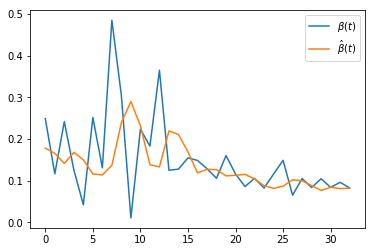

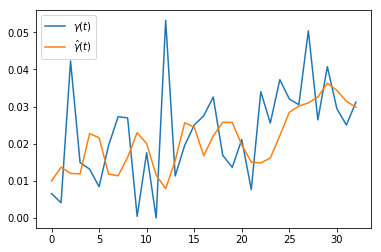

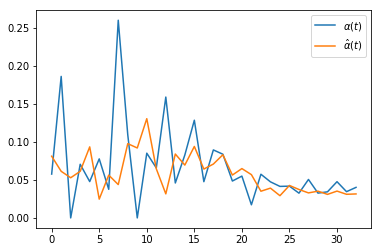

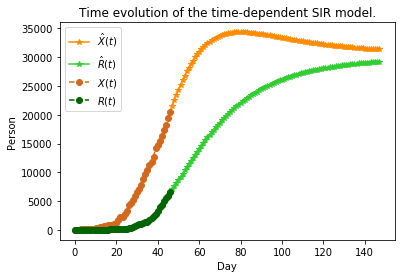

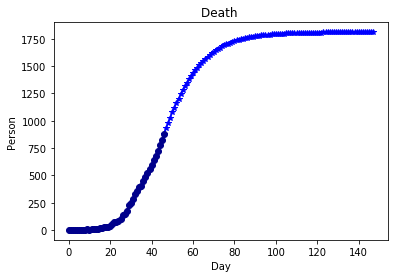

47 102
149


In [118]:
X,D,R=SIR(X_cml, recovered, death, population)

In [106]:
dates=list(df_dth.loc[(df_dth!=0).all(axis=1)].index)
# datetime.datetime.strptime(dates[0],"%m/%d/%y")

In [107]:
date_list = [(base+datetime.timedelta(days=x)).strftime("%m/%d/%y") for x in range(len(X)-len(dates))]
dates.extend(date_list)

In [108]:
dates=[datetime.datetime.strftime(datetime.datetime.strptime(dates[i],"%m/%d/%y"),"%Y-%m-%d") for i in range(len(dates))]

28543.68344791136

In [122]:
df_con

131
1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
1/27/20      0
1/28/20      0
1/29/20      0
1/30/20      1
1/31/20      1
2/1/20       1
2/2/20       2
2/3/20       3
2/4/20       3
2/5/20       3
2/6/20       3
2/7/20       3
2/8/20       3
2/9/20       3
2/10/20      3
2/11/20      3
2/12/20      3
2/13/20      3
2/14/20      3
2/15/20      3
2/16/20      3
2/17/20      3
2/18/20      3
2/19/20      3
2/20/20      3
...        ...
3/28/20    987
3/29/20   1024
3/30/20   1251
3/31/20   1397
4/1/20    1998
4/2/20    2543
4/3/20    2567
4/4/20    3082
4/5/20    3588
4/6/20    4778
4/7/20    5311
4/8/20    5916
4/9/20    6725
4/10/20   7598
4/11/20   8446
4/12/20   9205
4/13/20  10453
4/14/20  11487
4/15/20  12322
4/16/20  13430
4/17/20  14352
4/18/20  15722
4/19/20  17615
4/20/20  18539
4/21/20  20080
4/22/20  21370
4/23/20  23077
4/24/20  24530
4/25/20  26283
4/26/20  27890

[96 rows x 1 columns]

In [116]:
dates

['2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-11',
 '2020-05-12',
 '2020-05-13',
 '2020-05-14',
 '2020-05-

In [41]:
date_list[0].strftime("%m-%d-%y")

'04-27-20'

'05/06/20'

In [ ]:
import math
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

import datetime
inf=[]
rec=[]
dth=[]
dates=list(df_dth.loc[(df_dth!=0).all(axis=1)].index)
base = datetime.datetime.strptime(dates[-1], "%m/%d/%y")




def data_spilt(data, orders, start):
    x_train = np.empty((len(data) - start - orders, orders))
    y_train = data[start + orders:]

    for i in range(len(data) - start - orders):
        x_train[i] = data[i + start:start + orders + i]

    # Exclude the day (Feb. 12, 2020) of the change of the definition of confirmed cases in Hubei China.
#     x_train = np.delete(x_train, np.s_[28 - (orders + 1) - start:28 - start], 0)
#     y_train = np.delete(y_train, np.s_[28 - (orders + 1) - start:28 - start])

    return x_train, y_train


def ridge(x, y):
    print('\nStart searching good parameters for the task...')
    parameters = {'alpha': np.arange(0, 0.100005, 0.000005).tolist(),
                  "tol": [1e-8],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]}

    clf = GridSearchCV(Ridge(), parameters, n_jobs=-1, cv=5)
    clf.fit(x, y)

    print('\nResults for the parameters grid search:')
    print('Model:', clf.best_estimator_)
    print('Score:', clf.best_score_)

    return clf


X_cml= df_con.values
X_cml=X_cml.reshape((1,-1))[0]
X_cml=X_cml[X_cml != 0]
#X_cml=X_cml[:-1]
# recovered = cumulative recovered cases
recovered= df_rec.values
recovered=recovered.reshape((1,-1))[0]
recovered=recovered[recovered != 0]
#recovered=recovered[:-1]
# death = cumulative deaths
#death = np.array([2, 3, 3, 3, 4, 6, 9, 18, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 491, 564, 637, 723, 812, 909, 1017, 1114, 1368, 1381, 1524, 1666, 1772, 1870, 2006, 2121, 2239, 2348, 2445, 2595, 2666, 2718, 2747, 2791, 2838, 2873, 2915, 2946, 2984, 3015, 3045, 3073, 3100, 3123, 3140, 3162, 3173, 3180, 3194, 3204, 3218, 3231, 3242, 3250, 3253, 3261, 3267, 3276, 3283, 3287, 3293, 3298, 3301, 3306, 3311, 3314, 3321, 3327, 3331, 3335, 3338, 3340, 3340, 3342, 3344], dtype=np.float64)[:-27]
death= df_dth.values
death= death.reshape((1,-1))[0]
death= death[death!= 0]
#death=death[:-1]

recovered=recovered[len(recovered)-len(death):]
X_cml= X_cml[len(X_cml)-len(death):]
population =  1380004385
########## data preprocess ##########
def SIR(X_cml, recovered, death, population):
    X = X_cml - recovered - death
    R = recovered
    D= death

    n = np.array([population] * len(X), dtype=np.float64)

    S = n - X - R
    rho= 1/14

    X_diff = np.array([X[:-1], X[1:]], dtype=np.float64).T
    R_diff = np.array([R[:-1], R[1:]], dtype=np.float64).T
    D_diff= np.array([D[:-1],D[1:]], dtype=np.float64).T
    alpha= (D[1:]-D[:-1])/(rho*X[:-1])
    gamma = (R[1:] - R[:-1]) / (X[:-1]* (1-alpha))
    beta = n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]+ D[1:]- D[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1] -D[:-1]))
    R0 = beta / gamma

    ########## Parameters for Ridge Regression ##########
    ##### Orders of the two FIR filters in (12), (13) in the paper. #####
    orders_beta = 3
    orders_gamma = 3
    orders_alpha=3

    ##### Select a starting day for the data training in the ridge regression. #####
    start_beta = 10
    start_gamma = 10
    start_alpha=10
    ########## Print Info ##########
    print("\nThe latest transmission rate beta of SIR model:", beta[-1])
    print("The latest recovering rate gamma of SIR model:", gamma[-1])
    print("The latest mortality rate alpha of SIR model:", alpha[-1])
    print("The latest basic reproduction number R0:", R0[-1])

    ########## Ridge Regression ##########
    ##### Split the data to the training set and testing set #####
    x_beta, y_beta = data_spilt(beta, orders_beta, start_beta)
    x_gamma, y_gamma = data_spilt(gamma, orders_gamma, start_gamma)
    x_alpha,y_alpha= data_spilt(alpha, orders_alpha,start_alpha)

    ##### Searching good parameters #####
#     clf_beta = ridge(x_beta, y_beta)
#     clf_gamma = ridge(x_gamma, y_gamma)

    #### Training and Testing #####
    clf_beta = Ridge(alpha=0.003765, copy_X=True, fit_intercept=False, max_iter=None, normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_beta, y_beta)
    clf_gamma = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_gamma, y_gamma)
    clf_alpha = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_alpha, y_alpha)

#     clf_beta= model(x_beta,y_beta)
    
#     clf_gamma=model(x_gamma,y_gamma)
    beta_hat = clf_beta.predict(x_beta)
#     beta_hat= clf_beta.predict(np.reshape(x_beta, (x_beta.shape[0], 1, x_beta.shape[1]))) 
   
    gamma_hat = clf_gamma.predict(x_gamma)
    alpha_hat=  clf_alpha.predict(x_alpha)
#     gamma_hat= clf_gamma.predict(np.reshape(x_gamma, (x_gamma.shape[0], 1, x_gamma.shape[1])))
    
    ##### Plot the training and testing results #####
#     plt.figure(1)
#     plt.plot(y_beta, label=r'$\beta (t)$')
#     plt.plot(beta_hat, label=r'$\hat{\beta}(t)$')
#     plt.legend()

#     plt.figure(2)
#     plt.plot(y_gamma, label=r'$\gamma (t)$')
#     plt.plot(gamma_hat, label=r'$\hat{\gamma}(t)$')
#     plt.legend()
    
#     plt.figure(3)
#     plt.plot(y_alpha, label=r'$\alpha (t)$')
#     plt.plot(alpha_hat, label=r'$\hat{\alpha}(t)$')
#     plt.legend()


    ########## Time-dependent SIR model ##########

    ##### Parameters for the Time-dependent SIR model #####
    stop_X = 0 # stopping criteria
    stop_day = 100 # maximum iteration days (W in the paper)

    day_count = 0
    turning_point = 0

    S_predict = [S[-1]]
    X_predict = [X[-1]]
    R_predict = [R[-1]]
    D_predict= [D[-1]]

    predict_beta = np.array(beta[-orders_beta:]).tolist()
    predict_gamma = np.array(gamma[-orders_gamma:]).tolist()
    predict_alpha=  np.array(alpha[-orders_alpha:]).tolist()
    while (X_predict[-1] >= stop_X) and (day_count <= stop_day):
        if predict_beta[-1] > predict_gamma[-1]:
            turning_point += 1

        next_beta = clf_beta.predict(np.asarray([predict_beta[-orders_beta:]]))[0]
#         next_beta = clf_beta.predict(np.reshape(np.asarray([predict_beta[-orders_beta:]]),(np.asarray([predict_beta[-orders_beta:]]).shape[0],1,np.asarray([predict_beta[-orders_beta:]]).shape[1])))[0]
        next_gamma = clf_gamma.predict(np.asarray([predict_gamma[-orders_gamma:]]))[0]
#         next_gamma = clf_gamma.predict(np.reshape(np.asarray([predict_gamma[-orders_gamma:]]),(np.asarray([predict_gamma[-orders_gamma:]]).shape[0],1,np.asarray([predict_gamma[-orders_gamma:]]).shape[1])))[0]
        next_alpha = clf_alpha.predict(np.asarray([predict_alpha[-orders_alpha:]]))[0]
        if next_beta < 0:
            next_beta = 0
        if next_gamma < 0:
            next_gamma = 0
        if next_alpha < 0:
            next_alpha = 0
            

        predict_beta.append(next_beta)
        predict_gamma.append(next_gamma)
        predict_alpha.append(next_alpha)

        next_S = ((-predict_beta[-1] * S_predict[-1] *
                   X_predict[-1]) / n[-1]) + S_predict[-1]
        next_X = ((predict_beta[-1] * S_predict[-1] * X_predict[-1]) /
                  n[-1]) - ((1-predict_alpha[-1])* predict_gamma[-1] * X_predict[-1]) - (predict_alpha[-1] * rho * X_predict[-1]) + X_predict[-1]
        next_R = ((1-predict_alpha[-1])*predict_gamma[-1] * X_predict[-1]) + R_predict[-1]
        next_D= (predict_alpha[-1] *rho * X_predict[-1])+ D_predict[-1]
        S_predict.append(next_S)
        X_predict.append(next_X)
        R_predict.append(next_R)
        D_predict.append(next_D)

        day_count += 1

    ########## Print Info ##########
    print('\nConfirmed cases tomorrow:', np.rint(X_predict[1] + R_predict[1]+ D_predict[1]))
    print('Infected persons tomorrow:', np.rint(X_predict[1]))
    print('Recovered persons tomorrow:', np.rint(R_predict[1]))
    print('Death persons tomorrow:', np.rint(D_predict[1]))

    print('\nEnd day:', day_count)
    print('Confirmed cases on the end day:', np.rint(X_predict[-2] + R_predict[-2]))

    print('\nTuring point:', turning_point)

    ########## Plot the time evolution of the time-dependent SIR model ##########
#     plt.figure(4)
#     plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), X_predict, '*-', label=r'$\hat{X}(t)$', color='darkorange')
#     plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, '*-', label=r'$\hat{R}(t)$', color='limegreen')
    
    
#     plt.plot(range(len(X)), X, 'o--', label=r'$X(t)$', color='chocolate')
#     plt.plot(range(len(X)), R, 'o--', label=r'$R(t)$', color='darkgreen')
    
    
#     plt.xlabel('Day')
#     plt.ylabel('Person')
#     plt.title('Time evolution of the time-dependent SIR model.')

#     plt.legend()

#     plt.figure(5)
#     plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), D_predict, '*-', label=r'$\hat{D}(t)$', color='blue')
#     plt.plot(range(len(X)), D, 'o--', label=r'$D(t)$', color='darkblue')
#     plt.xlabel('Day')
#     plt.ylabel('Person')
#     plt.title('Death ')
#     plt.show()
    date_list = [(base+datetime.timedelta(days=x)).strftime("%m/%d/%y") for x in range(len(X)-len(dates))]
    dates.extend(date_list)
    for i in range(len(X)):
        inf.append({"date":dates[i], "value":X[i]})
        rec.append({"date":dates[i], "value":R[i]})
        dth.append({"date":dates[i], "value":D[i]})
    return X_predict, D_predict, R_predict
